
<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/b/bf/EAFIT-2015.png" align="left" hspace="10px" vspace="0px"></p>

<h1> Diplomado Python para Finanzas</h1>




<p><a name="contents"></a></p>

# Contenido Clase 3


- <a href="#revisitando">1. Revisitando Pandas</a><br>
- <a href="#revisitando">2. Caso Integrador Pandas</a><br>
- <a href="#stats">3. Estadistica descriptiva</a><br>
- <a href="#models">4. Modelos y Conceptos</a><br>



<p><a name="revisitando"></a></p>

# 1.0 Revisitando Pandas

Revisemos que tipo de operaciones podemos realizar sobre un DataFrame de pandas. A partir de este punto, los dataframes van a ser nuestro objeto de partida.

<p><a name="manipulacionDatos"></a></p>

## 1.1. Manipulación de datos

In [ ]:
import pandas as pd
import numpy as np

df=pd.read_csv("https://raw.githubusercontent.com/jisazac/pythonfinanzaseafit/master/ventas.csv") 

In [ ]:
df.head()

,Fecha,Producto1,Producto2,Producto3,Producto4
0,01/01/2009,29,20,35,NaN
1,02/01/2009,19,3,22,NaN
2,03/01/2009,24,12,22,NaN
3,04/01/2009,24,8,15,NaN
4,05/01/2009,120,111,141,NaN


In [ ]:
# El atributo columns nos permite recuperar el nombre de las columns
# en un objeto iterable
df.columns

Index(['Fecha', 'Producto1', 'Producto2', 'Producto3', 'Producto4'], dtype='object')

In [ ]:
#El atributo shape nos permite conocer las dimensiones de nuestro dataframe
# retornando una tupla (filas,columnas)
df.shape

(365, 5)

In [ ]:
#El metodo describe retorna un dataframe que contiene las estadisticas descriptivas
# de las columnas numericas del  dataframe  
df.describe()

,Producto1,Producto2,Producto3,Producto4
count,365.000000,365.000000,365.000000,178.000000
mean,2032.200000,1060.252055,2093.169863,2576.359551
std,1878.879799,1079.533086,1854.368523,2484.004743
min,0.000000,0.000000,0.000000,0.000000
25%,194.000000,90.000000,228.000000,0.000000
50%,1726.000000,678.000000,1686.000000,1443.500000
75%,3540.000000,1882.000000,3520.000000,4638.000000
max,6626.000000,4242.000000,6587.000000,7575.000000


<p><a name="formateo"></a></p>

## 1.2. Formateo de datos temporales

La función `to_datetime` de la libreria pandas permite convertir los datos a un formato especial de tiempo

In [ ]:
pd.to_datetime(df.Fecha).head()

0   2009-01-01
1   2009-02-01
2   2009-03-01
3   2009-04-01
4   2009-05-01
Name: Fecha, dtype: datetime64[ns]

In [ ]:
#Aqui en el arguemnto format introducimos
#el formato de fecha que se ajuste a los datos

pd.to_datetime(df.Fecha, format='%d/%m/%Y').head()

0   2009-01-01
1   2009-01-02
2   2009-01-03
3   2009-01-04
4   2009-01-05
Name: Fecha, dtype: datetime64[ns]

In [ ]:
#Aqui reemplazamos la columna Fecha por si misma pero en formato datetime
df.Fecha=pd.to_datetime(df.Fecha)

#El metodo index nos permite convertir una pseries del dataframe en el
# nuevo index del dataframe
df.set_index('Fecha', inplace=True)
df.head()

,Producto1,Producto2,Producto3,Producto4
Fecha,,,,
2009-01-01,29,20,35,NaN
2009-02-01,19,3,22,NaN
2009-03-01,24,12,22,NaN
2009-04-01,24,8,15,NaN
2009-05-01,120,111,141,NaN


<p><a name="formateo2"></a></p>

### 1.2.1. Otros formatos para la función datetime
- **%a**	Nombre del día de la semana abreviado en inglés. Ejemplo:	Sun, Mon, ...

- **%A**	Nombre completo del día de la semana e inglés.	Ejemplo: Sunday, Monday, ...

- **%w**	Día de la semana como número decimal.	Ejemplo: 0, 1, ..., 6

- **%d** Día del mes como número con dos digitos.	01, 02, ..., 31

- **%-d**	Dia del mes como numero decimal. Ejemplo:	1, 2, ..., 30

- **%b**	Nombre abreviado del mes en inglés. Ejemplo:	Jan, Feb, ..., Dec

- **%B**	Nombre completo del mes en inglés. Ejemplo:	January, February, ...

- **%m**	Mes como número con dos digitos. Ejemplo:	01, 02, ..., 12

- **%-m**	Mes como número decimal. Ejemplo:	1, 2, ..., 12

- **%Y**	Año como número decimal.	2013, 2019 etc.

- **%H**	Hora en formato 24 horas como número de 2 digitos. Ejemplo:	00, 01, ..., 23

- **%-H**	Hora en formato 24 horas como número decimal. Ejemplo:	0, 1, ..., 23

- **%I**	Hora en formato 12 horas como número con dos digitos.	Ejemplo: 01, 02, ..., 12

- **%-I** Hora en formato 12 horas como número decimal.	Ejemplo: 1, 2, ... 12

- **%p**	 AM o PM.	

- **%M**	Minutos como números de dos digitos. Ejemplo:	00, 01, ..., 59

- **%-M**	Minutos como números decimales. Ejemplo:	0, 1, ..., 59

- **%S**	Segundos como números en dos digitos.	00, 01, ..., 59

- **%-S**	Segundos como número decimal. Eejmplo:	0, 1, ..., 59

- **%Z**	Nombre de la zona horaria.	 

- **%-j**	Dia del año como numero decimal. Ejemplo:	1, 2, ..., 366

- **%U**	Número de semana del año, contando como día inicial los domingos. Todos los dias previos al primer domingo van en la semana 0. Ejemplo:	00, 01, ..., 53

- **%W**	Número de semana del año, contando como día inicial los lunes. Todos los dias previos al primer lunes del año se les asigna la semana 0. Ejmplo:	00, 01, ..., 53

- **%%**	Literalmente el caracter '%':	%

In [ ]:
# Veamos un ejemplo

#Importamos la funcion datetime del paquete datetime
from datetime import datetime

now = datetime.now() # La variable now va a contener la fecha y hora actual

#Extraigamos el año
year = now.strftime("%Y")
print("year:", year)

#Extragamos el mes
month = now.strftime("%m")
print("month:", month)

#Extragamos el dia
day = now.strftime("%d")
print("day:", day)

#Extragamos la hora
time = now.strftime("%H:%M:%S")
print("time:", time)

#Extraigamos la fecha y hora
date_time = now.strftime("'%d/%m/%Y', %H:%M:%S")
print("fecha y hora:",date_time)

year: 2023
month: 03
day: 09
time: 23:39:17
fecha y hora: '09/03/2023', 23:39:17


<p><a name="procesamientoNulos"></a></p>

## 1.3. Procesamiento de datos nulos

La presencia de datos dulos es una molestia constante en los proyectos de ciencia de datos o cualquier otro proyecto que requiera procesar informacion de distintas fuentes.

In [ ]:
#El metodo isna() retorna un boolean indicando si la entrada del dataframe es
# nula o contiene información.
df.isna().head() 

,Producto1,Producto2,Producto3,Producto4
Fecha,,,,
2009-01-01,False,False,False,True
2009-02-01,False,False,False,True
2009-03-01,False,False,False,True
2009-04-01,False,False,False,True
2009-05-01,False,False,False,True


Usar el comando `fillna()` para reemplazar los valores nulos con el valor deseado. Puede hacerse en una sola columna `df.columna.fillna()` o en todas al mismo tiempo `df.fillna()` 

In [ ]:
# Solo visual
df.Producto4.fillna(0)

Fecha
2009-01-01    0.0
2009-02-01    0.0
2009-03-01    0.0
2009-04-01    0.0
2009-05-01    0.0
             ... 
2009-12-27    0.0
2009-12-28    0.0
2009-12-29    0.0
2009-12-30    0.0
2009-12-31    0.0
Name: Producto4, Length: 365, dtype: float64

In [ ]:
# Cambiando los datos
df.Producto4.fillna(df.Producto4.mean(),inplace=True) #Importante inplace

<p><a name="indexacion"></a></p>

## 1.4. Indexación y localización
Usando los comandos `iloc` y `loc`  en un dataframe, se puede acceder a los datos con base en las etiquetas y la ubicación respectivamente 

In [ ]:
df.iloc[100:110]

,Producto1,Producto2,Producto3,Producto4
Fecha,,,,
2009-11-04,0,0,0,NaN
2009-12-04,0,0,0,NaN
2009-04-13,0,0,0,NaN
2009-04-14,0,0,0,NaN
2009-04-15,0,0,0,NaN
2009-04-16,0,0,0,NaN
2009-04-17,1286,820,1436,NaN
2009-04-18,1178,667,826,NaN
2009-04-19,2131,1155,1426,NaN


Indexación para un subconjunto de columnas

In [ ]:
df[['Producto1','Producto4']].iloc[100:110]

,Producto1,Producto4
Fecha,,
2009-11-04,0,2576.359551
2009-12-04,0,2576.359551
2009-04-13,0,2576.359551
2009-04-14,0,2576.359551
2009-04-15,0,2576.359551
2009-04-16,0,2576.359551
2009-04-17,1286,2576.359551
2009-04-18,1178,2576.359551
2009-04-19,2131,2576.359551


In [ ]:
df.iloc[:,1:3]

,Producto2,Producto3
Fecha,,
2009-01-01,20,35
2009-02-01,3,22
2009-03-01,12,22
2009-04-01,8,15
2009-05-01,111,141
...,...,...
2009-12-27,29,52
2009-12-28,41,99
2009-12-29,52,115


In [ ]:
#Tambien es posible realizr localizacion a partir de fechas
df.loc["2009-10-01":"2009-10-10"]

,Producto1,Producto2,Producto3,Producto4
Fecha,,,,
2009-10-01,81,45,79,2576.359551
2009-10-02,228,101,260,2576.359551
2009-10-03,366,203,354,2576.359551
2009-10-04,0,0,0,2576.359551
2009-10-05,728,362,523,2576.359551
2009-10-06,3460,2354,3978,2576.359551
2009-10-07,6274,4242,5435,7268.000000
2009-10-08,2999,1545,3185,4187.000000
2009-10-09,5496,2921,6587,6520.000000


Parar reasignar un valor de dataframe, simplemente se debe saber la localización, ya sea por indice o por etiqueta y usar el operador de asignación `=`

In [ ]:
df.iloc[109,0]=1000

In [ ]:
df.loc['2009-04-19','Producto1']=999

Validemos la re-asignación de los valores

In [ ]:
df[['Producto1']].iloc[108:110]

,Producto1
Fecha,
2009-04-19,999
2009-04-20,1000


<p><a name="organizacionDF"></a></p>

## 1.5. Organización de dataframes
El método `sort_values` permite organizar los dataframes con base a los valores de las columnas o las filas

In [ ]:
# De menor a mayor
df.sort_values(by="Producto1").head()

,Producto1,Producto2,Producto3,Producto4
Fecha,,,,
2009-11-04,0,0,0,2576.359551
2009-03-31,0,0,0,2576.359551
2009-04-04,0,0,0,2576.359551
2009-05-04,0,0,0,2576.359551
2009-06-04,0,0,0,2576.359551


In [ ]:
# De mayor a menor
df.sort_values(by="Producto1",ascending=False).head()

,Producto1,Producto2,Producto3,Producto4
Fecha,,,,
2009-09-07,6626,4227,5751,7575.000000
2009-06-17,6320,3388,6047,2576.359551
2009-10-07,6274,4242,5435,7268.000000
2009-07-15,6100,3767,5536,6939.000000
2009-05-06,6028,4120,4223,2576.359551


<p><a name="operacionesColFil"></a></p>

## 1.6. Operaciones con columnas y filas
La función `apply` regresa algún valor después de aplicarle una función a cada columna/fila del dataframe. 


In [ ]:
df['Producto3sqrt']=df.Producto3.apply(np.sqrt)

In [ ]:
df.tail()

,Producto1,Producto2,Producto3,Producto4,Producto3sqrt
Fecha,,,,,
2009-12-27,66,29,52,0.0,7.211103
2009-12-28,61,41,99,0.0,9.949874
2009-12-29,89,52,115,0.0,10.723805
2009-12-30,76,43,115,0.0,10.723805
2009-12-31,53,46,112,0.0,10.583005


In [ ]:
# Aplicamos la suma vertical de cada  columna en el dataframe
# axis=0
df.apply(np.sum, axis=0)

Producto1        738912.000000
Producto2        386992.000000
Producto3        764007.000000
Producto4        940371.235955
Producto3sqrt     14277.399684
dtype: float64

In [ ]:
# Aplicamos la suma horizontal de cada fila
# axis=0
df.apply(np.sum, axis=1)

Fecha
2009-01-01    2666.275630
2009-02-01    2625.049966
2009-03-01    2639.049966
2009-04-01    2627.232534
2009-05-01    2960.233893
                 ...     
2009-12-27     154.211103
2009-12-28     210.949874
2009-12-29     266.723805
2009-12-30     244.723805
2009-12-31     221.583005
Length: 365, dtype: float64

<AxesSubplot:ylabel='None'>

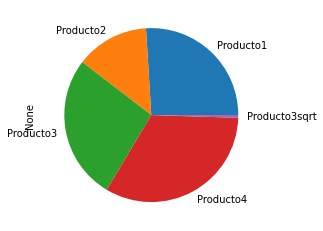

In [ ]:
#Un grafico de tortas utilizando el metodo .plot()
df.apply(np.sum, axis=0).plot(kind='pie')

<p><a name="agrupacion"></a></p>

## 1.7. Agrupando dataframes
El comando `groupby` permite agrupar y generar calculos y operaciónes sobre los valores agrupados.

In [ ]:
#Creamos la variable month para cada fecha en nuestro dataframe
df["month"] = [i.month for i in df.index]
df.head()


,Producto1,Producto2,Producto3,Producto4,Producto3sqrt,month
Fecha,,,,,,
2009-01-01,29,20,35,2576.359551,5.916080,1
2009-02-01,19,3,22,2576.359551,4.690416,2
2009-03-01,24,12,22,2576.359551,4.690416,3
2009-04-01,24,8,15,2576.359551,3.872983,4
2009-05-01,120,111,141,2576.359551,11.874342,5


In [ ]:
#Hacemos una agrupacion por mes y encontramos el maximo valor
# para cada columna
df.groupby("month").max()

,Producto1,Producto2,Producto3,Producto4,Producto3sqrt
month,,,,,
1,5298,2796,5765,6939.0,75.927597
2,5451,2868,5517,7052.0,74.276510
3,5904,3523,5762,7194.0,75.907839
4,5278,3499,5327,5837.0,72.986300
5,6028,4120,5397,7121.0,73.464277
6,6320,3499,6047,5259.0,77.762459
7,6100,3825,5536,7219.0,74.404301
8,5452,2865,6379,7044.0,79.868642
9,6626,4227,6535,7575.0,80.839347


In [ ]:
#Apliquemos agrupaciones y funciones al siguiente
# dataframe de ejemplo
df2 = pd.DataFrame({"Person": ["John", "Myla", "Lewis", "John", "Myla", "Lewis", "John", "Myla"], "Age": [24, 55, 21, 24, 26, 43, 64, 55]})
df2.head(8)

,Person,Age
0,John,24
1,Myla,55
2,Lewis,21
3,John,24
4,Myla,26
5,Lewis,43
6,John,64
7,Myla,55


In [ ]:
# Agrupar por persona y aplicar "min" a "Age"
df2.groupby("Person").Age.agg("min")             



Person
John     24
Lewis    21
Myla     26
Name: Age, dtype: int64

In [ ]:
# Agrupar por persona y edad y aplicar "count" a "Age"
# El metodo agg nos permite asignar una funcion especifica a 
# a una columna especifica a traves de un
# diccionrio. Muy util para aplicar funciones distintas a columnas distintas
df2.groupby(["Person","Age"]).agg({"Age":"count"})

Age
Person Age     
John   24     2
       64     1
Lewis  21     1
       43     1
Myla   26     1
       55     2

In [ ]:
# frecuencia de las edades
df2['Age'].value_counts()


24    2
55    2
21    1
26    1
43    1
64    1
Name: Age, dtype: int64

<p><a name="renormalizacion"></a></p>

## 1.8. Normalización de datos
En algunos algoritmos de Machine Learning (ML) es importante tener los datos normalizados. Para ellos la función `scale` se encarga de normalizar los datos quedando con una media cercana a 0 y una desviación estandar de 1

In [ ]:
from sklearn import preprocessing

In [ ]:
scaled=preprocessing.scale(df[['Producto4', 'Producto3sqrt']])

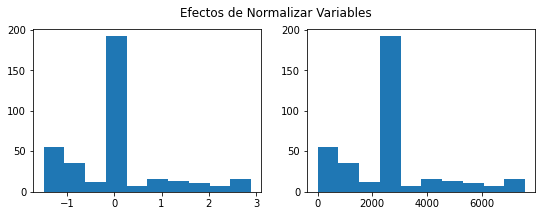

In [ ]:
import matplotlib.pyplot as plt
#Veamos como la variable Producto4 queda normaliza

plt.figure(figsize=(9, 3))
plt.subplot(121) #subplot(nrows, ncols, index)
plt.hist(scaled.T[0])
plt.subplot(122)
plt.hist(df.Producto4.values)
plt.suptitle('Efectos de Normalizar Variables')
plt.show()

In [ ]:
scaled.mean(axis=0)

array([-3.60367507e-16,  1.94669243e-16])

In [ ]:
scaled.std(axis=0)

array([1., 1.])

<p><a name="concom"></a></p>

## 1.9. Concatenación y combinación de dataframes

La concatenación se realiza mediante la función `concat()` y la combinación mediante la función `merge()`

In [ ]:
raw_data_1 = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}

raw_data_2 = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}

raw_data_3 = {
        'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}

data1 = pd.DataFrame(raw_data_1, columns = ['subject_id', 'first_name', 'last_name'])
data2 = pd.DataFrame(raw_data_2, columns = ['subject_id', 'first_name', 'last_name'])
data3 = pd.DataFrame(raw_data_3, columns = ['subject_id','test_id'])

In [ ]:
# Concatenar por filas
all_data = pd.concat([data1, data2])
all_data

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [ ]:
# Concatenar por columnas
all_data_col = pd.concat([data1, data2], axis = 1)
all_data_col

,subject_id,first_name,last_name,subject_id,first_name,last_name
0,1,Alex,Anderson,4,Billy,Bonder
1,2,Amy,Ackerman,5,Brian,Black
2,3,Allen,Ali,6,Bran,Balwner
3,4,Alice,Aoni,7,Bryce,Brice
4,5,Ayoung,Atiches,8,Betty,Btisan


In [ ]:
# Combinar all_data y data3 a lo largo del valor de subject_id
pd.merge(all_data, data3, on='subject_id')

,subject_id,first_name,last_name,test_id
0,1,Alex,Anderson,51
1,2,Amy,Ackerman,15
2,3,Allen,Ali,15
3,4,Alice,Aoni,61
4,4,Billy,Bonder,61
5,5,Ayoung,Atiches,16
6,5,Brian,Black,16
7,7,Bryce,Brice,14
8,8,Betty,Btisan,15


In [ ]:
# Combinar solo los datos que tienen el mismo 'subject_id' en data1 y data2 (interseccion)
pd.merge(data1, data2, on='subject_id', how='inner')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,4,Alice,Aoni,Billy,Bonder
1,5,Ayoung,Atiches,Brian,Black


In [ ]:
# Combinar solo los datos que tienen el mismo 'subject_id' en data1 y data2 (union)
pd.merge(data1, data2, on='subject_id', how='outer')



,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,1,Alex,Anderson,NaN,NaN
1,2,Amy,Ackerman,NaN,NaN
2,3,Allen,Ali,NaN,NaN
3,4,Alice,Aoni,Billy,Bonder
4,5,Ayoung,Atiches,Brian,Black
5,6,NaN,NaN,Bran,Balwner
6,7,NaN,NaN,Bryce,Brice
7,8,NaN,NaN,Betty,Btisan


### Ayuda visual para combinar DataFrames


<p><img alt="comparison  logo" width="450" height="380" src="https://www.dofactory.com/Images/sql/sql-joins.png" align="center" hspace="10px" vspace="0px"></p>





<p><a name="case"></a></p>

# 2.0 Caso Integrador Pandas

**Contexto de negocio** Usted es un analista de energéticas .Se le acaba de asignar un  analisis relacionado con el volumen de negociacion y la volatilidad de las siguientes acciones del sector energy:

1. Dominion Energy Inc. (Stock Symbol: D)
2. Exelon Corp. (Stock Symbol: EXC)
3. NextEra Energy Inc. (Stock Symbol: NEE)
4. Southern Co. (Stock Symbol: SO)
5. Duke Energy Corp. (Stock Symbol: DUK)

Especificamente, quiere analizar los retornos diarios y la volatilidad de cada activo ademas de un mercado ampliado. 

Queremos saber ademas si los retornos potenciales compensan el riesgo de tomar posiciones en estos activos.

**Problema.** Basado en contexto anterior, surge la siguiente pregunta: **"¿Cuál es la relación entre la volatilidad y los retornos diarios para estos activos, además que relación existe entre los retornos diarios y el mercado ampliado?"**

In [ ]:
# Importamos las libretias necesarias para nuestro ejercicio aplicado
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Cargue y visualizacion del dataframe
raw_df = pd.read_csv('https://raw.githubusercontent.com/jisazac/pythonfinanzaseafit/master/EnergyData.csv')
raw_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
0,2014-07-28,69.750000,71.059998,69.750000,70.879997,57.963978,1806400.0,D
1,2014-07-29,70.669998,70.980003,69.930000,69.930000,57.187099,2231100.0,D
2,2014-07-30,70.000000,70.660004,68.400002,68.970001,56.402020,2588900.0,D
3,2014-07-31,68.629997,68.849998,67.580002,67.639999,55.314388,3266900.0,D
4,2014-08-01,67.330002,68.410004,67.220001,67.589996,55.273487,2601800.0,D


Determinemos primero si tenemos missing values. Para eso usamos el método de  ```pandas```  ```isnull()``` para ver si hay ```NaN``` en ```raw_df``` 

In [ ]:
# Veamos si hay valores faltantes (NaNs)
raw_df.isnull().sum()

Date          0
Open          2
High         14
Low           7
Close         7
Adj Close     7
Volume       22
Symbol        0
dtype: int64

Ahora que sabemos que tenemos valores faltantes. Usaremos el metodo ```mean()``` para determinar que porcentaje de la columna tiene información faltante.

In [ ]:
raw_df.isnull().mean()

Date         0.000000
Open         0.000319
High         0.002231
Low          0.001116
Close        0.001116
Adj Close    0.001116
Volume       0.003506
Symbol       0.000000
dtype: float64

Vemos que para cada columna la cantidad de datos faltantes nos supera el 5%

### Ejercicio 1:

No queremos información faltante para nuestro analisis. Cual de las siguientes opciones es la **menos recomendable** para proceder en este caso particular?

(a) LLenar los espacios vacíos con la información del día anterior

(b) Reeemplazar los espacios recolectando de nuevo los datos

(c) Estimar los espacios vacios interpolando a partir de la información disponible

(d) Remover las observaciones con espacios vacíos de nuestra base de datos

**Solución** (a). 

1. La opción b es válida pero costosa en recursos de tiempo y dinero.

2. La opción c es igualmente válida pero algo excesiva dado que faltan pocos datos en la base de datos.

3. En la práctica, se toma la decisión de remover las filas sin información solo cuando la cantidad de información faltante es muy pequeña. 

4. La opción a es problematica porque reemplazar un vacío con información del día anterior dada la variabilidad natural en precios y volumenes diarios de las acciones. 


In [ ]:
# Removamos los NA de la data al eliminar las filas que los contengan

progress_df = raw_df.dropna()

## 2.1. Estandarizando Fechas

Quisieramos analizar estas acciones juntas a traves del tiempo. Esa tarea requiere que todas las acciones contengan informacion para el mismo conjunto de fechas. Aseguremonos primero que este sea el caso. Para eso utilizaremos en este caso el método ```groupby``` para agrupar por  ```Date```, y luego usar el metodo  ```count()``` para enumerar cuantas fechas distintas tenemos. Dado que tenemos 1259 filas por ticker, deberiamos tener un conteo total de 1259 por ticker.

In [ ]:
# Cuantas filas con data tenemos para cada acción
progress_df.groupby('Symbol').count()

,Date,Open,High,Low,Close,Adj Close,Volume
Symbol,,,,,,,
D,1230,1230,1230,1230,1230,1230,1230
DUK,1249,1249,1249,1249,1249,1249,1249
EXC,1239,1239,1239,1239,1239,1239,1239
NEE,1251,1251,1251,1251,1251,1251,1251
SO,1259,1259,1259,1259,1259,1259,1259


In [ ]:

raw_df.isnull().sum()

Date          0
Open          2
High         14
Low           7
Close         7
Adj Close     7
Volume       22
Symbol        0
dtype: int64

Vemos diferentes conjuntos de fechas para los diferentes tickers. Queremos que todos los simbolos tengan el mismo conjunto de fechas para nuestro proposito. Nuestra estrategia será crear un  ```clean_df``` que corresponda a un dataframe con las mismas fechas para cada ```Symbol```:

In [ ]:
# Utilizamos el metodo set que elimina duplicados de objetos iterables
set_dates_D = set(progress_df[progress_df['Symbol'] == 'D']['Date'])

set_dates_EXC = set(progress_df[progress_df['Symbol'] == 'EXC']['Date'])

set_dates_NEE = set(progress_df[progress_df['Symbol'] == 'NEE']['Date'])

set_dates_SO = set(progress_df[progress_df['Symbol'] == 'SO']['Date'])

set_dates_DUK = set(progress_df[progress_df['Symbol'] == 'DUK']['Date'])


# Del metodo set utilizamos la funcion intersection que nos deja solo los elementos comunes
# de los conjuntos ingresados como argumentos
set_unique_dates = set.intersection(set_dates_D,set_dates_EXC,set_dates_NEE,set_dates_SO,set_dates_DUK)

In [ ]:
# Filtramos las fechas que estan presentes en todos los tickers 
clean_df = progress_df[progress_df['Date'].isin(set_unique_dates)].copy()

In [ ]:
# Veamos como queda
clean_df.groupby('Symbol').count()

,Date,Open,High,Low,Close,Adj Close,Volume
Symbol,,,,,,,
D,1192,1192,1192,1192,1192,1192,1192
DUK,1192,1192,1192,1192,1192,1192,1192
EXC,1192,1192,1192,1192,1192,1192,1192
NEE,1192,1192,1192,1192,1192,1192,1192
SO,1192,1192,1192,1192,1192,1192,1192


### Ejercicio 2:

Escriba una verificacion breve para determinar que cada accion tenga las mismas fechas que las demas. . (Pista: use el metodo ```set()```)

In [ ]:
#Desarrolle aqui el ejercicio
check_set_dates_D = set(clean_df[clean_df['Symbol'] == 'D']['Date'])
check_set_dates_EXC = set(clean_df[clean_df['Symbol'] == 'EXC']['Date'])
check_set_dates_NEE = set(clean_df[clean_df['Symbol'] == 'NEE']['Date'])
check_set_dates_SO = set(clean_df[clean_df['Symbol'] == 'SO']['Date'])
check_set_dates_DUK = set(clean_df[clean_df['Symbol'] == 'DUK']['Date'])

print(check_set_dates_D == check_set_dates_EXC)
print(check_set_dates_D == check_set_dates_NEE)
print(check_set_dates_D == check_set_dates_SO)
print(check_set_dates_D == check_set_dates_DUK)

True
True
True
True


De click **aquí** para ver la respuesta.

<!---
# No esperaba verte tan rápido aquí :(

# Una posible solución
check_set_dates_D = set(clean_df[clean_df['Symbol'] == 'D']['Date'])
check_set_dates_EXC = set(clean_df[clean_df['Symbol'] == 'EXC']['Date'])
check_set_dates_NEE = set(clean_df[clean_df['Symbol'] == 'NEE']['Date'])
check_set_dates_SO = set(clean_df[clean_df['Symbol'] == 'SO']['Date'])
check_set_dates_DUK = set(clean_df[clean_df['Symbol'] == 'DUK']['Date'])

print(check_set_dates_D == check_set_dates_EXC)
print(check_set_dates_D == check_set_dates_NEE)
print(check_set_dates_D == check_set_dates_SO)
print(check_set_dates_D == check_set_dates_DUK)

--->

## 2.2. Variables adicionales requeridas para nuestro análisis

Hay dos variables de interés para nuestro análisis

1. Retorno diario (Precio de apertura contra precio de cierre) 
2. Volatilidad de los retornos diarios

¿Por qué son importantes?

1. Volatilidad: Nos da información del movimiento de los precios, es una medida directamente relacionada con el nivel de riesgo asociado al poseer una acción. 
2. Retorno: Nos da la rentabilidad por poseer el activo en un periodo de tiempo.

Calculemos estos valores y añadamoslos al dataframe ```clean_df```:

In [ ]:
#Calculemos una medida de volatilidad
clean_df['VolStat'] = (clean_df['High'] - clean_df['Low']) / clean_df['Open']

#Calculamos el retorno
clean_df['Return'] = (clean_df['Close'] / clean_df['Open']) - 1.0

#Expresamos el volumen en millones
clean_df['Volume_Millions'] = clean_df['Volume'] / 1000000.0 
clean_df.head()



,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,VolStat,Return,Volume_Millions
0,2014-07-28,69.750000,71.059998,69.750000,70.879997,57.963978,1806400.0,D,0.018781,0.016201,1.8064
1,2014-07-29,70.669998,70.980003,69.930000,69.930000,57.187099,2231100.0,D,0.014858,-0.010471,2.2311
2,2014-07-30,70.000000,70.660004,68.400002,68.970001,56.402020,2588900.0,D,0.032286,-0.014714,2.5889
3,2014-07-31,68.629997,68.849998,67.580002,67.639999,55.314388,3266900.0,D,0.018505,-0.014425,3.2669
4,2014-08-01,67.330002,68.410004,67.220001,67.589996,55.273487,2601800.0,D,0.017674,0.003861,2.6018


In [ ]:
import plotly.express as px


fig = px.line(clean_df, x="Date", y="Volume", color='Symbol')
fig.show()

Dado que queremos analizar la relación existente entre la volatilidad diaria y los retornos, crearemos una columna adicional con la etiqueta   ```True``` cuando el retorno diario es positivo y ```False``` cuando el retorno diario sea negativo. Con estas etiquetas (labels) podemos agrupar los dias en cohortes de retornos positivos y retornos negativos para comparar la volatilidad promedio de esos dias. Llamaremos a esta columna  ```ReturnFlag```.

Como tactica de programación usaremos el concepto de **anonymous function**; es decir, una función definida pero no nombrada:
```python
lambda arguments: expression
```

La palabra clave ```lambda``` le indica a  Python que estamos uilizando una función anónima . Luego, los ```arguments``` son los nombres dados a los argumentos. Pueden ser  una  ```x```, o una ```y```, o como deseemos llamarla. En este caso, usaremos el nombre  ```row``` para el argumento introducido ya que de hecho se va a tratar de una fila de nuestro dataframe. La ```expression``` es aquello que aplicamos a los  ```arguments```; es decir la función

Veamos como podemos utilizar la función anónima para crear la caracteristica ```ReturnFlag```:

In [ ]:
clean_df['ReturnFlag'] = clean_df.apply(lambda row: True if row['Return'] > 0 else False, axis=1) # Volume en Millones
clean_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,VolStat,Return,Volume_Millions,ReturnFlag
0,2014-07-28,69.750000,71.059998,69.750000,70.879997,57.963978,1806400.0,D,0.018781,0.016201,1.8064,True
1,2014-07-29,70.669998,70.980003,69.930000,69.930000,57.187099,2231100.0,D,0.014858,-0.010471,2.2311,False
2,2014-07-30,70.000000,70.660004,68.400002,68.970001,56.402020,2588900.0,D,0.032286,-0.014714,2.5889,False
3,2014-07-31,68.629997,68.849998,67.580002,67.639999,55.314388,3266900.0,D,0.018505,-0.014425,3.2669,False
4,2014-08-01,67.330002,68.410004,67.220001,67.589996,55.273487,2601800.0,D,0.017674,0.003861,2.6018,True


Note que el método ```apply()``` toma una función anónima y la aplica a las filas del dataframe a través del segundo argumento  ```axis```. ```axis=0``` aplica la función a columnas, mientras que  ```axis=1``` la aplica a las filas.

¿Qué pasa entonces al interior de esta expresión?
```python
clean_df['ReturnFlag'] = clean_df.apply(lambda row: True if row['Return'] > 0 else False, axis=1)
```

1. ```pandas``` reconoce a través del método ```apply```  que esta operando sobre el dataframe ```clean_df``` DataFrame
2. El método  ```apply``` toma una función como input que será aplicada al dataframe  ```clean_df```
3. Dado que el segundo argumento de ```apply``` es ```axis=1``` el input en la función anónima es una fila individual.
4. El nuevo valor es almacenado en la columna  ```clean_df['ReturnFlag']```

### Ejercicio 3:
Usando ```apply()``` y ```lambda``` genere dos nuevas columnas llamadas **rally** y otra llamada **sellof**. Con valores ```True``` para la primera si retorno supera el 2% y ```False``` en caso contrario. La segunda con valores ```True``` si el retorno es menor al 2% con ```False``` en caso contrario

In [ ]:
#Desarrolle aqui el ejercicio

clean_df['rally'] = clean_df.apply(lambda row: True if row['Return'] > 0.02 else False, axis=1)

clean_df['selloff'] = clean_df.apply(lambda row: True if row['Return'] < -0.02 else False, axis=1)

De click **aquí** para ver la respuesta.

<!---
# No esperaba verte tan rápido aquí :(

# Una posible solución

clean_df['rally'] = clean_df.apply(lambda row: True if row['Return'] > 0.02 else False, axis=1)

clean_df['selloff'] = clean_df.apply(lambda row: True if row['Return'] < -0.02 else False, axis=1)


--->

### Ejercicio 4:

Usando ```apply()``` y ```lambda```, escriba codigo para crear una nueva columna llamada  ```YYYY``` para el clean df```clean_df```, donde la nueva columna va a ser el año de la observacion en formato string. Por ejemplo, para la fila con  ```Date``` igual a 2014-07-28, el valor para nueva columna será '2014'. Recuerde el slicing de strings, puede acceder a los pimeros 4 caracteres de un string  ```my_string``` usando ```my_string[:4]```.

In [ ]:
#Desarrolle aqui el ejercicio
clean_df["YYYY"]= clean_df.apply(lambda row: row["Date"] [:4], axis=1)

De click **aquí** para ver la respuesta.

<!---
# No esperaba verte tan rápido aquí :(

# Una posible solución

clean_df['YYYY'] = clean_df.apply(lambda row: row['Date'][:4], axis=1)


--->

In [ ]:
# One possible solution
clean_df['YYYY'] = clean_df.apply(lambda row: row['Date'][:4], axis=1)

### Ejercicio 5:
Usando ```apply()``` y ```lambda```, escriba el codigo para crear una nueva columna en el dataframe ```clean_df``` llamada ```AvgDailyPrice``` que calcule un precio promedio diario dado que el volumen supere los 5 millones o no. Calcule la nueva columna como (Open + High + Low + Close)/4 si el volumnes mayor a 5 millones, o como (High + Low + Close)/3  si el volumen es menor a 5 millones.

In [ ]:
#  Desarrolle aqui el ejercicio
clean_df["AvgDailyPrice"]= clean_df.apply(lambda row: (row['Open']+(row['High']+row['Low']+row['Close'])/4 if row["Volume_Millions"]> 5 else row['High']+row['Low']+row['Close'])/3,axis=1)
clean_df



,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,VolStat,Return,Volume_Millions,ReturnFlag,rally,selloff,YYYY,AvgDailyPrice
0,2014-07-28,69.750000,71.059998,69.750000,70.879997,57.963978,1806400.0,D,0.018781,0.016201,1.8064,True,False,False,2014,70.563332
1,2014-07-29,70.669998,70.980003,69.930000,69.930000,57.187099,2231100.0,D,0.014858,-0.010471,2.2311,False,False,False,2014,70.280001
2,2014-07-30,70.000000,70.660004,68.400002,68.970001,56.402020,2588900.0,D,0.032286,-0.014714,2.5889,False,False,False,2014,69.343336
3,2014-07-31,68.629997,68.849998,67.580002,67.639999,55.314388,3266900.0,D,0.018505,-0.014425,3.2669,False,False,False,2014,68.023333
4,2014-08-01,67.330002,68.410004,67.220001,67.589996,55.273487,2601800.0,D,0.017674,0.003861,2.6018,True,False,False,2014,67.740000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6270,2019-07-22,88.599998,88.690002,87.839996,88.150002,88.150002,2160300.0,DUK,0.009594,-0.005079,2.1603,False,False,False,2019,88.226667
6271,2019-07-23,88.180000,88.239998,87.370003,87.680000,87.680000,3141800.0,DUK,0.009866,-0.005670,3.1418,False,False,False,2019,87.763334
6272,2019-07-24,87.949997,87.980003,86.800003,87.180000,87.180000,2386500.0,DUK,0.013417,-0.008755,2.3865,False,False,False,2019,87.320002
6273,2019-07-25,86.900002,87.389999,86.169998,86.489998,86.489998,2680300.0,DUK,0.014039,-0.004718,2.6803,False,False,False,2019,86.683332


De click **aquí** para ver la respuesta.

<!---
# No esperaba verte tan rápido aquí :(

# Una posible solución


clean_df['AvgDailyPrice'] = clean_df.apply(lambda row:(row['Open']+row['High']+row['Low']+row['Close'])/4 if row['Volume'] > 5000000 else (row['High']+row['Low']+row['Close'])/3, axis=1)
clean_df.head()


--->

## 2.3. Etiquetando regimenes de volatilidad

Nos gustaria etiquetar periodos en una categoria de volatilidad dentro de una nueva columna llamada ```VolLevel``` para acción usando un limite superior e inferior. Por ejemplo, para el  Symbol D nos gustaria una columna determinada así:

```python
if VolStrat > upper_threshold_dict['D']:
    VolLevel = '3_HIGH'
elif VolStrat < lower_threshold_dict['D']:
    VolLevel = '1_LOW'
else:
    VolLevel = '2_MEDIUM'
```

Veamos si a partir de esta estrategia de etiquetado podemos extraer mas información de nuestros datos

In [ ]:
# Determinado las cotas inferiores (Usando el 25avo percentil)
lower_threshold_dict = clean_df.groupby('Symbol')['VolStat'].quantile(0.25).to_dict() # limite 25avo percentil
lower_threshold_dict

{'D': 0.010240046986389131,
 'DUK': 0.010018315803797114,
 'EXC': 0.011881680089172456,
 'NEE': 0.010258642787424542,
 'SO': 0.009734019893739591}

In [ ]:
# Determinamos limites superiores (usando el 75avo percentil)
upper_threshold_dict = clean_df.groupby('Symbol')['VolStat'].quantile(0.75).to_dict() # limite 75avo percentil
upper_threshold_dict

{'D': 0.017960914526108228,
 'DUK': 0.01759838077408522,
 'EXC': 0.021801523265676366,
 'NEE': 0.01768021802425081,
 'SO': 0.01683044706857934}

Para lograr etiquetar periodos segun el regimen de volatilidad definiremos una nueva columna llamada ```VolLevel``` para cada accion utliznado los limites superiroes e inferiroes definidosfor each Symbol using some lower and upper bound values. Definiremos una funcion personalizada par alcanzar este objetivo

In [ ]:
# Nuestra funion personalizada, que recibe una fila de und ataframe agregado
# y retona un string sea LOW, MEDIUM, o HIGH
def funcion_personalizada(row):
    row_symbol = row['Symbol']    # el valor del Symbol en la fila value 
    row_volstat = row['VolStat']  # el valor del  VolStat  en la fila
    
    lower_threshold = lower_threshold_dict[row_symbol] # Dicccionario {string:float}
    upper_threshold = upper_threshold_dict[row_symbol] # Dicccionario  {string:float}
    
    # Sistema de decisiones de nuestra funcion
    if row_volstat > upper_threshold:
        return '3_HIGH'
    elif row_volstat < lower_threshold:
        return '1_LOW'
    else:
        return '2_MEDIUM'

In [ ]:
# Applicamos funcion_personalziada al dataframe de pandas fila por fila (axis=1)
clean_df['VolLevel'] = clean_df.apply(lambda row: funcion_personalizada(row), axis=1)
clean_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,VolStat,Return,Volume_Millions,ReturnFlag,rally,selloff,YYYY,AvgDailyPrice,VolLevel
0,2014-07-28,69.750000,71.059998,69.750000,70.879997,57.963978,1806400.0,D,0.018781,0.016201,1.8064,True,False,False,2014,70.563332,3_HIGH
1,2014-07-29,70.669998,70.980003,69.930000,69.930000,57.187099,2231100.0,D,0.014858,-0.010471,2.2311,False,False,False,2014,70.280001,2_MEDIUM
2,2014-07-30,70.000000,70.660004,68.400002,68.970001,56.402020,2588900.0,D,0.032286,-0.014714,2.5889,False,False,False,2014,69.343336,3_HIGH
3,2014-07-31,68.629997,68.849998,67.580002,67.639999,55.314388,3266900.0,D,0.018505,-0.014425,3.2669,False,False,False,2014,68.023333,3_HIGH
4,2014-08-01,67.330002,68.410004,67.220001,67.589996,55.273487,2601800.0,D,0.017674,0.003861,2.6018,True,False,False,2014,67.740000,2_MEDIUM


### Ejercicio 6:

Usando el  ```clean_df``` y una funcion ```lambda``` al inerior de un ```apply()```, escriba una funcion ```nueva_funcion_personalizada()``` que genere una columna ```EnhancedVolLevel``` similar al anterior ejercicio, solo que en este caso se va a conatr con 5 categorias de volatilidad siguiendo esta logica: 

```python
if VolStrat > 90th percentile:
    VolLevel = '5_VERY_HIGH'
elif VolStrat > 75th percentile:
    VolLevel = '4_HIGH'
elif VolStrat > 25th percentile:
    VolLevel = '3_MEDIUM'
elif VolStrat > 10th percentile:
    VolLevel = '2_LOW'
else:
    VolLevel = '1_VERY_LOW'
```

Use estas nuevas categoria para determinar si existen patrones entre volatilidad y el sentido de los retornos, para hacer eso use la siguiente linea de codigo:

```python
clean_df.groupby(['Symbol','EnhancedVolLevel'])['ReturnFlag'].mean()
```

In [ ]:
#Desarrolle aqui el ejercicio
Noventa_threshold_dict = clean_df.groupby('Symbol')['VolStat'].quantile(0.90).to_dict()
Setenta_threshold_dict = clean_df.groupby('Symbol')['VolStat'].quantile(0.75).to_dict()
Veinticinco_threshold_dict = clean_df.groupby('Symbol')['VolStat'].quantile(0.25).to_dict()
Diez_threshold_dict = clean_df.groupby('Symbol')['VolStat'].quantile(0.10).to_dict()
def nueva_funcion_personalizada(row):
  row_VoltStat= row["VolStat"]
  row_Symbol= row['Symbol']
  Noventa_threshold= Noventa_threshold_dict[row_Symbol]
  Setenta_threshold= Setenta_threshold_dict[row_Symbol]
  Veinticinco_threshold= Veinticinco_threshold_dict[row_Symbol]
  Diez_threshold= Diez_threshold_dict[row_Symbol]
  if row_VoltStat > Noventa_threshold:
    return'5_VERY_HIGH'
  elif row_VoltStat > Setenta_threshold:
    return'4_HIGH'
  elif row_VoltStat > Veinticinco_threshold:
    return'3_MEDIUM'
  elif row_VoltStat > Diez_threshold:
    return'2_LOW'
  else:
    return'1_VERY_LOW'
  


De click **aquí** para ver la respuesta.

<!---
# No esperaba verte tan rápido aquí :(

# Una posible solución

def new_custom_function(row):
    row_symbol = row['Symbol']    # the Symbol value in the row
    row_volstat = row['VolStat']  # the VolStat value in the row
    
    very_lower_threshold = very_lower_threshold_dict[row_symbol] # Dictionary of {string:float}
    lower_threshold = lower_threshold_dict[row_symbol] # Dictionary of {string:float}
    upper_threshold = upper_threshold_dict[row_symbol] # Dictionary of {string:float}
    very_upper_threshold = very_upper_threshold_dict[row_symbol] # Dictionary of {string:float}
    
    # The function decision, return value depending on very low, low, medium, high, or very high volatility
    if row_volstat > very_upper_threshold:
        return '5_VERY_HIGH'
    elif row_volstat > upper_threshold:
        return '4_HIGH'
    elif row_volstat > lower_threshold:
        return '3_MEDIUM'
    elif row_volstat > very_lower_threshold:
        return '2_LOW'
    else:
        return '1_VERY_LOW'

    
very_upper_threshold_dict = clean_df.groupby('Symbol')['VolStat'].quantile(0.90).to_dict() # 90th percentile bound
upper_threshold_dict = clean_df.groupby('Symbol')['VolStat'].quantile(0.75).to_dict() # 75th percentile bound
lower_threshold_dict = clean_df.groupby('Symbol')['VolStat'].quantile(0.25).to_dict() # 25th percentile bound
very_lower_threshold_dict = clean_df.groupby('Symbol')['VolStat'].quantile(0.10).to_dict() # 10th percentile bound


# Calculo y adicion de una nueva columna
clean_df['EnhancedVolLevel'] = clean_df.apply(lambda row: new_custom_function(row), axis=1)
print(clean_df.head())

# Resultado
print("--------------------------------")
clean_df.groupby(['Symbol','EnhancedVolLevel'])['ReturnFlag'].mean()


--->

In [ ]:
clean_df["EnhancedVolLevel"]=clean_df.apply(lambda row:nueva_funcion_personalizada(row), axis=1)
clean_df.groupby(['Symbol','EnhancedVolLevel'])['ReturnFlag'].mean()

Symbol  EnhancedVolLevel
D       1_VERY_LOW          0.508333
        2_LOW               0.573034
        3_MEDIUM            0.558725
        4_HIGH              0.528090
        5_VERY_HIGH         0.408333
DUK     1_VERY_LOW          0.550000
        2_LOW               0.522472
        3_MEDIUM            0.558725
        4_HIGH              0.511236
        5_VERY_HIGH         0.433333
EXC     1_VERY_LOW          0.533333
        2_LOW               0.533708
        3_MEDIUM            0.508389
        4_HIGH              0.533708
        5_VERY_HIGH         0.500000
NEE     1_VERY_LOW          0.566667
        2_LOW               0.550562
        3_MEDIUM            0.567114
        4_HIGH              0.522472
        5_VERY_HIGH         0.500000
SO      1_VERY_LOW          0.516667
        2_LOW               0.511236
        3_MEDIUM            0.530201
        4_HIGH              0.500000
        5_VERY_HIGH         0.516667
Name: ReturnFlag, dtype: float64


Podemos concluir que los activos de nuestra base de datos no muestran patrones significativos en terminos de direccion promedio de los retornos bajo distintos regimenes de volatilidad

In [ ]:
clean_df.groupby(['Symbol','EnhancedVolLevel'])['ReturnFlag'].mean()
##ReturnFlag es un boolean que dice Verdadero o Falso si el retorno era positivo o negativo

Symbol  EnhancedVolLevel
D       1_VERY_LOW          0.508333
        2_LOW               0.573034
        3_MEDIUM            0.558725
        4_HIGH              0.528090
        5_VERY_HIGH         0.408333
DUK     1_VERY_LOW          0.550000
        2_LOW               0.522472
        3_MEDIUM            0.558725
        4_HIGH              0.511236
        5_VERY_HIGH         0.433333
EXC     1_VERY_LOW          0.533333
        2_LOW               0.533708
        3_MEDIUM            0.508389
        4_HIGH              0.533708
        5_VERY_HIGH         0.500000
NEE     1_VERY_LOW          0.566667
        2_LOW               0.550562
        3_MEDIUM            0.567114
        4_HIGH              0.522472
        5_VERY_HIGH         0.500000
SO      1_VERY_LOW          0.516667
        2_LOW               0.511236
        3_MEDIUM            0.530201
        4_HIGH              0.500000
        5_VERY_HIGH         0.516667
Name: ReturnFlag, dtype: float64

## Comparando los retornos contra un mercado ampliado

¿Cómo se comparan los retornos de estas 5 acciones contra un mercado accionario ampliado? Para esta pregunta haremos uso del indice  S&P 500, un indice accionario compuesto por las 500 acciones enlistas de mayor capitalizacion en los Estados Unidos. El indice es utilizado de forma regular como represtnacion del mercado accionario de los Estados Unidos. Si podemos determinar la existencia o no de una relacion significativa entre nuestras 5 acciones y el S&P 500 podremos decir que existen caracterisiticas idiosincraticas del sector energetico al interior del mercado accioanrio.


Carguemos la data del SP y añadamosla al dataframe limpio con el que veniamos trabajando:

In [ ]:
# Carguemos la informacion del ETF del SP500
market_df = pd.read_csv('https://raw.githubusercontent.com/jisazac/pythonfinanzaseafit/master/SPY.csv')

In [ ]:
market_df['Symbol'] = 'SPY' # añadimos la columna de Symbol
market_df['Return'] = (market_df['Close'] / market_df['Open']) - 1.0 # Calculamos los retornos
market_df['VolStat'] = (market_df['High'] - market_df['Low']) / market_df['Open']
market_df

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,Return,VolStat
0,2014-08-18,196.800003,197.449997,196.690002,197.360001,178.729111,75424000,SPY,0.002846,0.003862
1,2014-08-19,197.839996,198.539993,197.440002,198.389999,179.661896,59135000,SPY,0.002780,0.005560
2,2014-08-20,198.119995,199.160004,198.080002,198.919998,180.141846,72763000,SPY,0.004038,0.005451
3,2014-08-21,199.089996,199.759995,198.929993,199.500000,180.667160,67791000,SPY,0.002059,0.004169
4,2014-08-22,199.339996,199.690002,198.740005,199.190002,180.386368,76107000,SPY,-0.000752,0.004766
...,...,...,...,...,...,...,...,...,...,...
1254,2019-08-12,289.959991,291.609985,287.019989,288.070007,288.070007,62629500,SPY,-0.006518,0.015830
1255,2019-08-13,287.739990,294.149994,287.359985,292.549988,292.549988,94299800,SPY,0.016716,0.023598
1256,2019-08-14,288.070007,288.739990,283.760010,283.899994,283.899994,135622100,SPY,-0.014476,0.017287
1257,2019-08-15,284.880005,285.640015,282.390015,284.649994,284.649994,99556600,SPY,-0.000807,0.011408


### Ejercicio 7:

Usando ```market_df``` y ```clean_df``` cree un nuevo DataFrame ```modified_clean_df``` que no es otra cosa que el  ```clean_df``` con la columna del retorno mensual del SPY```MeanMonthSPYReturn```.

Para aquellos familiarizados con SQL, el merging y joining de DataFrames puede ser ejecutado en python mas o menos igual que en SQL. En este caso usaremos la interseccion de fechas entre  clean_df y market_df 

 Asi cada entrada en la nueva columna deberia ser el retorno mensual del SPY para el mes dado por la columna ```Date```. La primera y ultima fila del resutado  de ```modified_clean_df``` deberian producir los siguientes  outputs de head(1) y tail(1):
```python
print(modified_clean_df[['Date','Symbol','YYYYMM','MeanMonthSPYReturn']].head(1))
```

                 Date       Symbol YYYYMM MeanMonthSPYReturn
                 2014-08-01 D      201408 0.001443

```python
print(modified_clean_df[['Date','Symbol','YYYYMM','MeanMonthSPYReturn']].tail(1))
```
                 Date       Symbol YYYYMM MeanMonthSPYReturn
                 2019-07-26 DUK    201907 0.000167

In [ ]:
import pandas as pd
clean_df["YYYYMM"]=pd.to_datetime(clean_df["Date"]).dt.strftime("%Y%m")
market_df["YYYYMM"]=pd.to_datetime(market_df["Date"]).dt.strftime("%Y%m")

monthly_returns= market_df.groupby("YYYYMM")["Return"].mean().reset_index()
monthly_returns.rename(columns={"Return":"MeanMonthSPYReturn"}, inplace=True)

modified_clean_df= pd.merge(clean_df,monthly_returns,on="YYYYMM")
modified_clean_df.reset_index()

print(modified_clean_df[['Date','Symbol','YYYYMM','MeanMonthSPYReturn']].tail(1))




            Date Symbol  YYYYMM  MeanMonthSPYReturn
5939  2019-07-26    DUK  201907            0.000167



De click **aquí** para ver la respuesta.

<!---
# No esperaba verte tan rápido aquí :(

# Una posible solución


# Añadimos YYYYMM a market_df y clean_df
market_df['YYYYMM'] = market_df.apply(lambda row: row['Date'][:4] + row['Date'][5:7], axis=1)
clean_df['YYYYMM'] = clean_df.apply(lambda row: row['Date'][:4] + row['Date'][5:7], axis=1)

# Calculamos un market_df_modificado para SPY
modified_market_df = market_df.groupby(['Symbol','YYYYMM']).mean().reset_index()
modified_market_df = modified_market_df.rename(columns={'Return':'MeanMonthSPYReturn'}) # rename column

# Hacemos un merge interno en la columna YYYYMM
modified_clean_df = pd.merge(clean_df, modified_market_df[['YYYYMM','MeanMonthSPYReturn']], how='inner', on='YYYYMM')

# Imprimimos resultados
print(modified_clean_df[['Date','Symbol','YYYYMM','MeanMonthSPYReturn']].head(1))
print(modified_clean_df[['Date','Symbol','YYYYMM','MeanMonthSPYReturn']].tail(1))

--->

<p><a name="models"></a></p>

# 3.0 Estadistica Descriptiva

El analisis estadisitcio proporciona un poderoso conjunto de herramientas para analizar y extraer conclusiones de cualquier colección de datos. El primer conjunto de metodos que vamos a estudiar se conoce como **Estadistica Descriptiva**, la cual se encarga de estudiar como resumir de forma efectiva un conjunto de datos para describir los aspectos mas importantes de datos para obtener inforamción. 

## 3.1 Medidas de tendencia central

### 3.1.1  Media muestral (Promedio)

Tambien conocida como el promedio aritmetico es una medida de tendencia central con las siguientes propiedades.

$\bar{x}=\frac{\sum_{i=1}^{n}x_{i}}{n}=\frac{x_{1}+x_{2}+..+x_{n}}{n}$


1. La suma de las desviaciones con respecto a $\bar{x}$ es igual cero.
La media es el centro de gravedad de la distribución de la variable. La media muestral es donde el diagrama de puntos se equilibra 

<p><img alt="comparison  logo" width="750" height="280" src="https://files.realpython.com/media/py-stats-01.3254dbfe6b9a.png"
" align="center" hspace="10px" vspace="0px"></p>

2. Si a todos los valores de la variable se le suma una misma cantidad, la media aritmética queda aumentada en dicha cantidad.

3. La media aritmética está comprendida entre el valor máximo y el valor mínimo del conjunto de datos

4. Si se efectúa un cambio de unidad de medida a los datos (por ejemplo de metros a centímetros), la media queda afectada por dicho cambio de escala.

5. La media está influenciada por los valores de cada uno de los datos (sensible a datos extremos "outliers")


In [ ]:
# Media a partir de una lista usando las funciones por default de
# sum() y len()
x=[10,19,40, 7,22,25]
mean = sum(x) / len(x)
print("Media Aritmetia de x: ", mean)

Media Aritmetia de x:  20.5


In [ ]:
# Media a partir de una lista usando numpy
import numpy as np
mean_np = np.mean(x)
mean_np

20.5

In [ ]:
# Media a partir de una lista usando numpy ignorando nan
import numpy as np
mean_np=np.nanmean(x)
mean_np

20.5

In [ ]:
# Media a partir de un objeto pd.Series usando el método mean() 
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/jisazac/pythonfinanzaseafit/master/ventas.csv") 
mean=df["Producto1"].mean()
print(mean)

2032.2


### Ejercicio 8

Muestre un ejemplo a través de código de las propiedades **1**, **2** y **3** de las medias aritmeticas

In [ ]:
# Desarrolle aqui su ejercicio
valores= np.arange(10)
print("prop1",sum(valores[i]-np.mean(valores) for i in range(len(valores)))==0)
print("prop2",np.mean(valores)+1==np.mean(valores+1))
print("prop3",min(valores)<np.mean(valores)<max(valores))


prop1 True
prop2 True
prop3 True



De click **aquí** para ver la respuesta.

<!---
# No esperaba verte tan rápido aquí :(

# Una posible solución



x=[10,19,40, 22, 54, 46, 33]

#Propiedad 1
sum_desv=0
x_bar=np.mean(x)
for i in x:
  sum_desv=sum_desv+(i-x_bar)
 
print("Suma de desviaciones: ", sum_desv)  

#Propiedad 2 
y=np.array([100, 133,  88, 32,22, 56])
mean_y=np.mean(y)
c_mas_y=y+3
mean_c_mas_y=np.mean(c_mas_y)
print("Media original: ",mean_y,"Media modificada: ",mean_c_mas_y)

#Propiedad 3
y=np.array([100, 133,  88, 32,22, 56])
if np.mean(y)<np.max(y) and np.mean(y)>np.min(y):
  print("Se cumple")
else:
  print("S*t happens")  

--->

### 3.1.2  Media Ponderada (Promedio Ponderado)

Medida de tendencia central apropiada cuando en un conjunto de datos cada uno de ellos tiene una importancia relativa (o peso) respecto de los demás datos. Se obtiene multiplicando cada uno de los datos por su ponderación (peso) para luego sumarlos, obteniendo así una suma ponderada; después se divide esta entre la suma de los pesos.

$\bar{x}=\frac{\sum_{i=1}^{n}w_{i}x_{i}}{n}=\frac{w_{1}x_{1}+w_{2}x_{2}+..+w_{n}x_{n}}{w_{1}+w_{2}+..+w_{n}}$




In [ ]:
#Media ponderada usando listas
x = [8.0, 1, 2.5, 4, 28.0]
w = [0.1, 0.2, 0.3, 0.25, 0.15]
wmean = sum(w[i] * x[i] for i in range(len(x))) / sum(w)
wmean

6.95

In [ ]:
#Media ponderada usando numpy y objetos pd.SERIES
y, z, w = np.array(x), pd.Series(x), np.array(w)
wmean = np.average(y, weights=w)
print("Media de numpy array:", y)

wmean = np.average(z, weights=w)
print("Media de pd.Series:", y)

Media de numpy array: [ 8.   1.   2.5  4.  28. ]
Media de pd.Series: [ 8.   1.   2.5  4.  28. ]


### Ejercicio 9

Calcule el retorno YTD de un portafolio con los activos A, B y C si sus pesos respectivos son 30%, 45% y 25% y los retornos YTD son 1%, 2% y -3% respectivamente

In [ ]:
#Desarrolle aqui el ejercicio
retornos=np.array([0.01, 0.02, -0.03])
pesos=np.array([0.3, 0.45, 0.25])
rp = np.average(retornos, weights=pesos)
print("retorno de portaoflio: " ,rp)

retorno de portaoflio:  0.0045000000000000005


De click **aquí** para ver la respuesta.

<!---
# No esperaba verte tan rápido aquí :(

# Una posible solución
retornos=np.array([0.01, 0.02, -0.03])
pesos=np.array([0.3, 0.45, 0.25])
rp = np.average(retornos, weights=pesos)
print("retorno de portaoflio: " ,)

--->

### 3.1.3  Media Geometrica 
Generalmente utilizada para promediar tasas de cambio en el tiempo o para calcular el crecimiento de una variable. En finanzas, se usa comunmente para promediar una serie de retornos. Debido a la desigualdad de Jensen, la media geometrica siempre es menor o igual que la media aritmetica, de hecho, esta distancia entre ambas medias aumenta a medida que los datos tienen mayor variabilidad entre ellos.



$ G=\sqrt[n]{x_{1}x_{2}x_{3}..x_{n}}$

<p><img alt="comparison  logo" width="750" height="280" src="https://files.realpython.com/media/py-stats-02.ec1ca0f9a9ac.png"
" align="center" hspace="10px" vspace="0px"></p>

In [ ]:
#Media geometrica usando listas
x = [8.0, 1, 2.5, 4, 28.0]
gmean = 1
for item in x:
  gmean *= item
gmean **= 1 / len(x)
gmean

4.677885674856041

In [ ]:
#Media geometrica utilizando scipy
import scipy
from scipy import stats
scipy.stats.gmean(x)

4.67788567485604

### 3.1.3  Mediana
La mediana de un conjunto de números es el número medio en el conjunto (después que los números han sido arreglados del menor al mayor) -- o, si hay un número par de datos, la mediana es el promedio de los dos números medios.

La mediana tiene la particularidad de no ser sensible a los valores extremos como si pasa con la media

In [ ]:
# Mediana calculada con numpy
x = [8.0, 1, 2.5, 4, 10]
median = np.median(x)
print(median)

4.0


### 3.1.3  Moda
Es el valor con mayor frecuencia en una de las distribuciones de datos, esta medida de tendnecia central es apropiada pra trabajar con variables categoricas o con variables numericas discretas

In [ ]:

x = ["alto", "medio", "bajo", "medio", "alto","alto"]
mode_ = scipy.stats.mode(x)
mode_

<ipython-input-83-f35a3ead9941>:2: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

<ipython-input-83-f35a3ead9941>:2: DeprecationWarning:

Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.



ModeResult(mode=array(['alto'], dtype='<U5'), count=array([3]))

## 3.2 Medidas de dispersión

Definimos como **dispersión** a la variabilidad alrededor de la tendencia central. nos enfocaremos en medidas de disersion absoluta, es decir, una medida de variabilidad presente sin comparacion a algun punto de referencia o benchmark.  

### 3.2.1  Varianza Muestral
Es una medida de dispersión calculada como el promedio de las desviaciones cuadráticas respecto de la media. Es decir, calcula que tan dispersos estan numericament las observaciones de la media.

 $S^{2}=\frac{\sum_{i=1}^{n}(x_{i}-\bar{x})^{2}}{n}
$

- La varianza tiene como valor mínimo 0
- Es posible que dos muestras compartan media y mediana pero tengan varianza completamente distintas entre sí. He ahí la utilidad de contar este tipo de medidas.

In [ ]:
# Calculando la varianza con listas
x = [8.0, 1, 2.5, 4, 10,33,98, 57, 39, 93,120,32,21,19]
n = len(x)
mean_ = sum(x) / n
var = sum([(item - mean_)**2 for item in x]) / (n-1)
var

1529.9299450549454

In [ ]:
# Calculando la varianza con numpy
import numpy as np
x = [8.0, 1, 2.5, 4, 10,33,98, 57, 39, 93,120,32,21,19]
var_np = np.var(x,ddof=1)
var_np

1529.9299450549452

In [ ]:
# Calculando la varianza para un objeto pd.Series
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/jisazac/pythonfinanzaseafit/master/ventas.csv") 
var_pandas=df["Producto1"].var(ddof=1)
print(var_pandas)


3530189.297802198


### 3.2.2  Desviación Estandár
Medida calculada como la raiz cuadrada de la varianza utilizada para cuantificar  la dispersión de un conjunto de datos numéricos.

- Una desviación estándar baja indica que la mayor parte de los datos  tienden a estar agrupados cerca de su media.

- Una desviación estándar alta indica que los datos se extienden sobre un rango de valores más amplios.

In [ ]:
#Calculando la desviacion estandar utilizando numpy
import numpy as np
y = [8.0, 1, 2.5, 4, 10,33,98, 57, 39, 93,120,32,21,19]
np.std(y, ddof=1)

39.11431892612915

In [ ]:
# Calculando la varianza para un objeto pd.Series
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/jisazac/pythonfinanzaseafit/master/ventas.csv") 
std_pandas=df["Producto1"].std(ddof=1)
print(std_pandas)


1878.8797986572208


### 3.2.3 Sesgo Muestral   (skewness)


La siguiente figura nos muestra dos conjuntos de datos asimetricos. 

El conjunto represenado por los puntos verdes evidencia un sesgo negativo indicando una cola dominante en la izquierda. Un sesgo positivo corresponde a colas mas pesadas al lado derecho, lo cual puede verse en los puntos blancos. 

- Valores negativos del sesgo correspondenden a colas pesadas a la izquierda. 

- Valores positivos del sesgo correspondenden a colas pesadas a la derecha. 

- Si el sesgo se ubica en vlaores cercanos a cero  entonces se considera que el conjunto de datos analizado es simetrico. 

<p><img alt="comparison  logo" width="750" height="280" src="https://files.realpython.com/media/py-stats-07.92abf9f362b0.png"
" align="center" hspace="10px" vspace="0px"></p>



In [ ]:
# Calculando el sesgo utilizando scipy 
from scipy import stats
import scipy
y = [8.0, 1, 2.5, 4, 10,33,98, 57, 39, 93,120,32,21,19-1,-3,-4,-7,-100]
scipy.stats.skew(y)

-0.15111045967164807

In [ ]:
# Calculando el sesgo para un objeto pd.Series
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/jisazac/pythonfinanzaseafit/master/ventas.csv") 
skew_pandas=df["Producto1"].skew()
print(skew_pandas)


0.5460114096154275


### 3.2.3 Curtosis   
La curtosis es una medida del peso combinado de las colas de una distribucion relativo al resto de la distribución,es decir, la proprocion de la probabilidad que se ubica en las colas..

- Una distribucion con colas mas pesadas que la distribucipn normal se llama leptocúrtica. (Mayor probabilidad de valores extremos Curtosis > 3) 
- Una distribución con colas mas livianas se llama platicúrtica. (Curtosis < 3)
- Finalmente aquellas distribuciones idénticas a la normal en lo que corresponde al peso de sus colas se denomina mesocúrtica. (Curtosis $\sim$ 3)

<p><img alt="comparison  logo" width="600" height="300" src="https://www.maa.org/sites/default/files/images/upload_library/19/NormalCaucy.png"
" align="center" hspace="10px" vspace="0px"></p>


In [ ]:
# Usando scipy para calcular curtosis
from scipy.stats import kurtosis
# Generemos un nmpy array con 10000 observaciones a partir de una distribucion normal
mu=0
sigma=1
s = np.random.normal(mu, sigma, 10000)
print(kurtosis(s,fisher=False))

2.959941504768724


El calculo del VAR es ciego al peso de la curtosis es decir a colas pesadas

<p><a name="models"></a></p>

# 4.0 Modelos y Conceptos

Veamos algunas aplicaciones y conceptos interesantes desarrollados en python


### 4.1 Cadenas de Markov

En la teoría de la probabilidad, se conoce como cadena de Márkov o modelo de Márkov a un tipo especial de **proceso estocástico discreto** en el que la probabilidad de que ocurra un evento depende solamente del **evento inmediatamente anterior**.​ Esta característica de falta de memoria recibe el nombre de propiedad de Markov.

Las cadenas de Markov y sus respectivos diagramas pueden ser usados para modelar las probabilidades de ciertos climas financieros y asi predecir la propension de condiciones futuras de mercado.


Para este ejercicio consideramos 3:

- **Bullish markets**: periodos de tiempo donde los precios de los activos suben con una sensación optimista de los agentes hacia el futuro. 
- **Bearish markets**: periodos de tiempo donde los precios de los activos bajan con una visión pesimista del futuro.
- **Stagnant markets**: el mercado se comporta flat.


En los mercados justos se asume que la información está diponible para todos y la fluctuación de precios obedece a aleatoriedad completamente.

Consideremos un mercado hipotético con propiedades markovianas con los siguienes patrones de comportamiento empiricos:

1. Después de una semana bullish hay 90% de chance de que la siguiente semana tambien sea bullish.
Adicionalmete, hay  7.5% de chance de que a una semana bullish la siga un bearish y solo  un 2.5%
de probabilidad de que sea una semana stagnant. 

2. Despues de una semana bearish hay 80% de chance de que la semana siguiente tambien lo sea. Adicionalmete, hay  15% de chance de que a una semana bearish la siga una bullish y solo  un 5% de probabilidad de que sea una semana stagnant.


3. Despues de una semana stagnant hay un 50% de chance de que la semana siguiente tambien lo sea. Adicionalmete, hay  25% de chance de que a una semana stagnant la siga ya sea una semana  bullish o una bearish  .

Al compilar esta informacion obtenemos la matriz de transicion M:

| De/A     	| Bullish 	| Bearish 	| Stagnant 	|
|----------	|---------	|---------	|----------	|
| Bullish  	| 0.9     	| 0.075   	| 0.025    	|
| Bearish  	| 0.15    	| 0.8     	| 0.05     	|
| Stagnant 	| 0.25    	| 0.25    	| 0.5      	|

Veamos una implementacion en python de una cadena de markov para el ejemplo de los 3 estados del mercado

In [ ]:
import numpy as np

class MarkovChain():
  def __init__(self,transition_matrix,states):
    """
    """
    self.transition_matrix= np.atleast_2d(transition_matrix)
    self.states=states
    self.index_dict={self.states[index]: index for index in range(len(self.states))}
    self.state_dict={index:self.states[index]  for index in range(len(self.states))}
  def next_state(self, current_state):
    """
    """
    
    return np.random.choice(self.states,p=self.transition_matrix[self.index_dict[current_state],:])

  def generate_states(self,current_state,no=10):
    """
    """
    future_states=[]
    for i in range(no):
      next_state = self.next_state(current_state)
      future_states.append(next_state)
    return future_states  
  


In [ ]:
#Definimos nuestra matriz de transicion
transition_matrix=[[0.9, 0.075 ,0.025],
                   [0.15, 0.8  ,0.05],
                   [0.25, 0.25  ,0.5]]

#Instanciamos nuestra cadena_mercado como un objeto de clase MarkovChain
cadena_mercado=MarkovChain(transition_matrix=transition_matrix, states=["Bullish","Bearish","Stagnant"])

#Ejecutemos un paso para ver si estamos hoy en una semana bullish, en que semana 
# estado podriamos estar la proxima semana
cadena_mercado.next_state(current_state="Bullish")    

'Bullish'

Si quiere replicabilidad de la tesis, hay que dejar quieta la semilla

In [ ]:
#Hagamos una simulación de 10 semanas empezando con una semana stagnant
n_sim=10
cadena_mercado1=MarkovChain(transition_matrix=transition_matrix, states=["Bullish","Bearish","Stagnant"])
simulacion1=cadena_mercado1.generate_states(current_state="Stagnant",no=n_sim)  
print("Realizacion de una simulación para 10 semanas")
print(simulacion1)


Realizacion de una simulación para 10 semanas
['Stagnant', 'Bullish', 'Bearish', 'Bearish', 'Stagnant', 'Bullish', 'Bearish', 'Stagnant', 'Bearish', 'Bullish']


## 4.2. Ley de los grandes números (La maldición del jugador o La Casa siempre gana)

La ley de los grandes números señala que a medida que el número de observaciones o intentos aumenta, la probabilidad observada se acerca al valor esperado (teórico)
Esto significa que a medida que la **muestra** crece, el promedio de la muestra se acerca a la media de la población total.

$$ \lim_{x \rightarrow \infty } P\left ( \left | \bar{X} - \mu \right | < \varepsilon \right )=1 $$

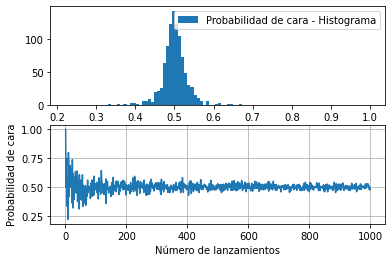

In [ ]:
import matplotlib.pyplot as plt
import random 

n=1
prob=[]
flip=[]

while n<1000:
    cara=0
    sello=0

    for i in range(n):
        if random.randint(0,1)==0:
            cara+=1
        else:
            sello+=1
    # k= eventos de cara / eventos totales         
    k=cara/(cara+sello)
    prob.append(k)
    flip.append(n)
    n+=1

plt.subplot(2,1,1)
plt.hist(prob,100,label='Probabilidad de cara - Histograma')
plt.legend()


plt.subplot(2,1,2)
plt.plot(flip,prob)
plt.xlabel('Número de lanzamientos')
plt.ylabel('Probabilidad de cara')
plt.grid(True)

plt.show()

## 4.3. Simulación de Montecarlo
Podemos definir la simulacion de montecarlo como ​ es un método no determinista o estadístico numérico que sirve para aproximar expresiones matemáticas complejas y costosas de evaluar con exactitud. Su nombre es una referencia al casino de Montecarlo en Mónaco. Veamos un aplicación:

<p><img alt="comparison  logo" width="300" height="300" src="http://teachingmath.info/circsq.jpg"
" align="center" hspace="10px" vspace="0px"></p>

Suponga un circulo de radio $r$ perfectamente introducido en un cuadrado de lado $2r$, asi tendriamos que:

- Area del circulo $\pi r^{2}$
- Area del cuadrado $4 r^{2}$
- Distancia dos puntos: $d=\sqrt{\left ( x_{1}-x_{2} \right )^{2}+\left ( y_{1}-y_{2} \right )^{2}}$
- La razon circulo/ cuadrado de las areas sería:

    $ \frac{\pi r^{2}}{4 r^{2}}=\frac{\pi}{4}$

Use una estrategia de generacion de puntos aleatorios para calcular $\pi$





In [ ]:
import math
import random

### Calculadorea de distancia euclideana
def dist_cal (x1, y1 ,x2, y2):
    distance = math.sqrt((x1 - x2)**2 + (y1 -y2)**2) 
    return distance

#Generador de numeros aleatorios (x,y)
def create_random(n_val):
    point_list = []
    for x in range(n_val):
        # El radio de nuestro circulo mide 10000
        x = random.randint(-10000,10000)
        y = random.randint(-10000,10000)
        
        point_list.append([x,y])
    return point_list    



In [ ]:
adentro = 0
fuera = 0
n_valores = 99999

points = create_random(n_valores)
  
for i in points:
  if dist_cal(i[0],i[1], 0,0) <= 10000:
    adentro = adentro +1
  
  
  
print ("Ratio circulo" , (adentro / (n_valores)))
print("Estimación de pi  ", 4*(adentro / (n_valores)))

Ratio circulo 0.7840778407784078
Estimación de pi   3.1363113631136312


## 4.4 Caminatas Aleatorias

Proceso estocástico que representa una sucesion de pasos de forma aleatoria. Este concepto senta las bases de lo que se conoce como movimiento browniano.

In [ ]:
%pylab inline
from itertools import cycle
from mpl_toolkits.mplot3d import Axes3D
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.9/dist-packages/IPython/core/magics/pylab.py:159: UserWarning:

pylab import has clobbered these variables: ['time', 'flip', 'random', 'median', 'datetime', 'var', 'mean']
`%matplotlib` prevents importing * from pylab and numpy



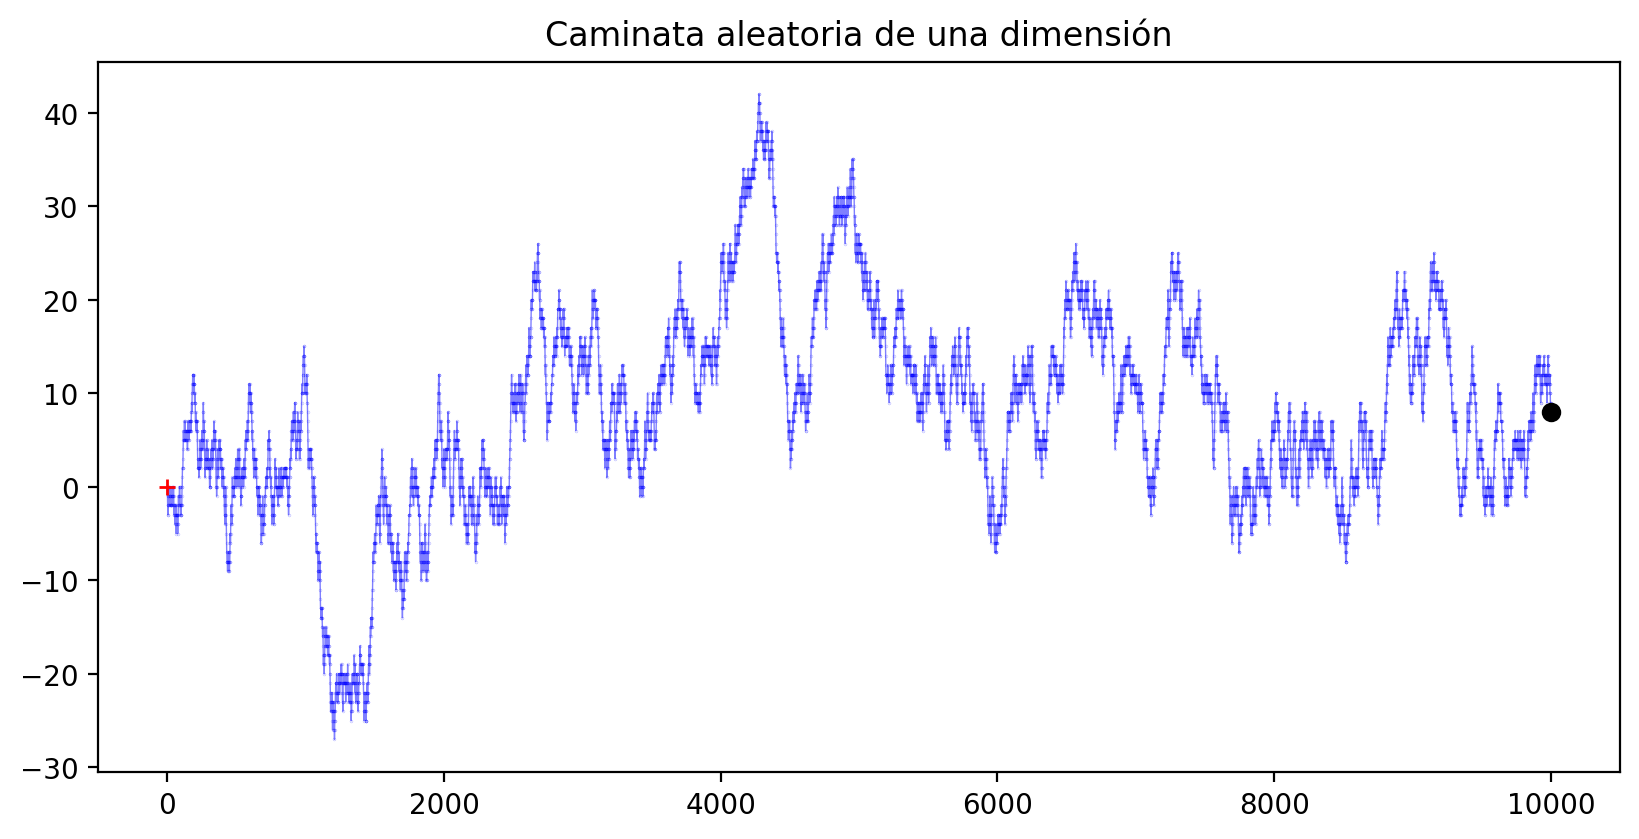

In [ ]:
# Definamos los parametros de nuestra caminata aleatoria

#Numero de dimensiones
dims = 1
#Numero de pasos
step_n = 10000
# Conjunto de decision de los pasos (Como seria esto en el caso de un browniano?)
step_set = [-1, 0, 1]

#Punto de origen
origin = np.zeros((1,dims))

# Simulacion 
step_shape = (step_n,dims)

#Utilizamos el metodo random.choice para dar pasos
steps = np.random.choice(a=step_set, size=step_shape)

#Concatenamos y sumamos cada paso para poder "avanzar"
path = np.concatenate([origin, steps]).cumsum(0)

start = path[:1]
stop = path[-1:]
# Graficamos el recorrido
fig = plt.figure(figsize=(8,4),dpi=200)
ax = fig.add_subplot(111)
ax.scatter(np.arange(step_n+1), path, c='blue',alpha=0.25,s=0.05);
ax.plot(path,c='blue',alpha=0.5,lw=0.5);
ax.plot(0, start, c='red', marker='+')
ax.plot(step_n, stop, c='black', marker='o')
plt.title('Caminata aleatoria de una dimensión')
plt.tight_layout(pad=0)
plt.show()

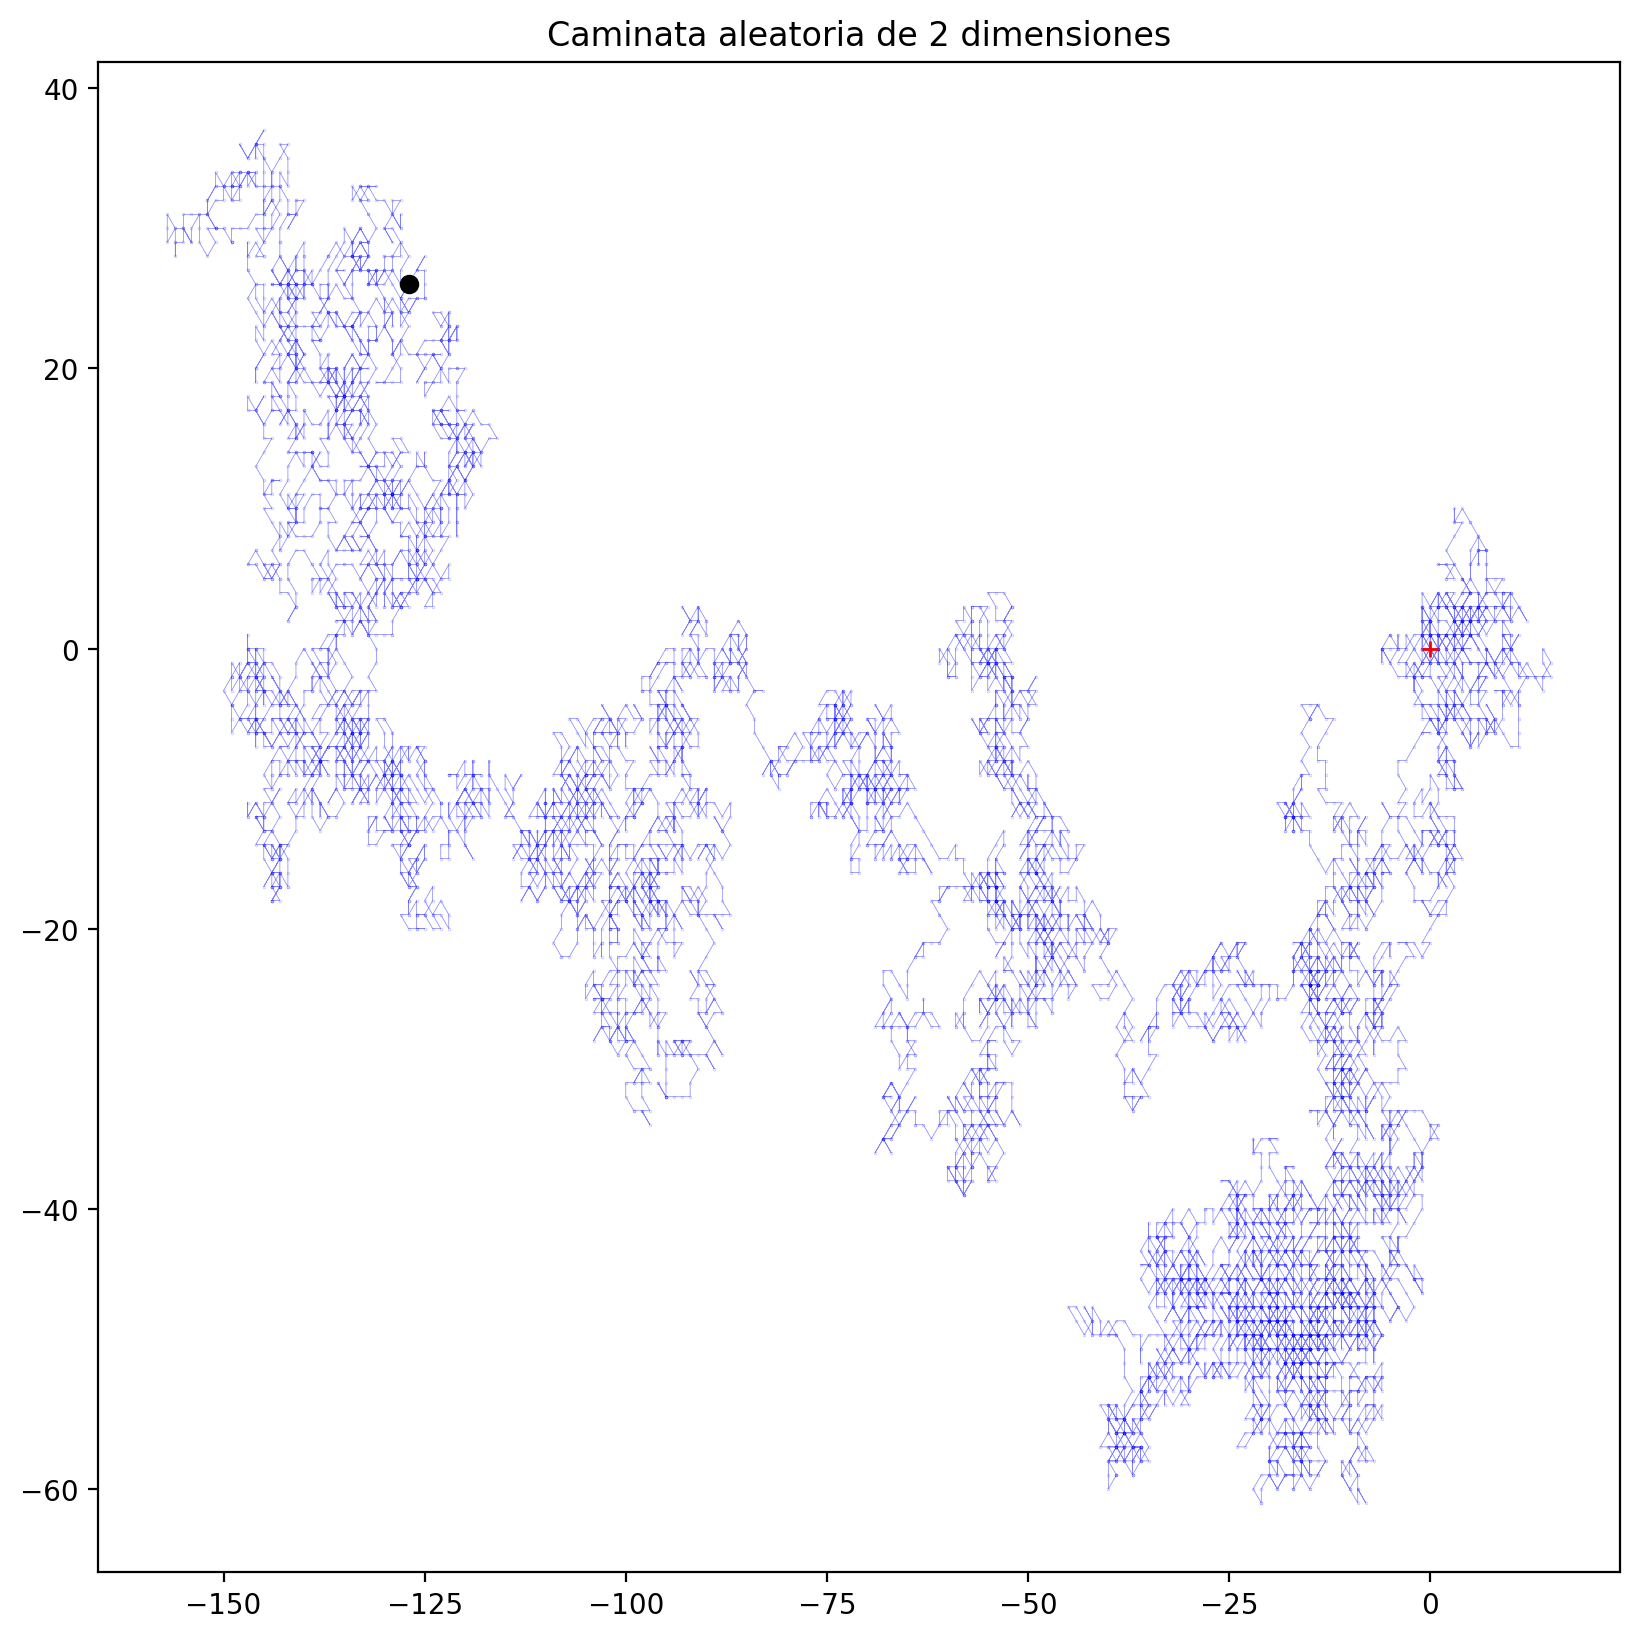

In [ ]:
# Definamos los parametros de nuestra caminata aleatoria
#Numero de dimensiones
dims = 2

#Numero de pasos
step_n = 10000

#Conjunto de decision de los pasos a dar
step_set = [-1, 0, 1]

#El origen
origin = np.zeros((1,dims))

# Simulación en  2D
step_shape = (step_n,dims)

steps = np.random.choice(a=step_set, size=step_shape)
path = np.concatenate([origin, steps]).cumsum(0)
start = path[:1]
stop = path[-1:]
# Plot the path
fig = plt.figure(figsize=(8,8),dpi=200)
ax = fig.add_subplot(111)
ax.scatter(path[:,0], path[:,1],c='blue',alpha=0.25,s=0.05)
ax.plot(path[:,0], path[:,1],c='blue',alpha=0.5,lw=0.25,)
ax.plot(start[:,0], start[:,1],c='red', marker='+')
ax.plot(stop[:,0], stop[:,1],c='black', marker='o')
plt.title('Caminata aleatoria de 2 dimensiones')
plt.tight_layout(pad=0)


## 4.5 Movimiento Browniano Geometrico

El movimiento browniano geométrico (GBM)  es un proceso estocástico de tiempo **continuo** en el que el logaritmo de la cantidad variable  sigue aleatoriamente un movimiento browniano (también llamado proceso de Wiener) con deriva  (drift). Es un  proceso estocásticos que satisface una ecuación diferencial estocástica (SDE).

Suele ser utilizado para modelar los precios de las acciones.

<p><img alt="comparison  logo" width="350" height="220" src="https://i.stack.imgur.com/73jrO.png"
" align="center" hspace="10px" vspace="0px"></p>

Al despejar la ecuación esocastica obtenemos un valor para $S_{t}$ así:

$S_{t}=S_{0}e^{(\mu-\frac{\sigma^{2}}{2})dt+\sigma w_{t}}$

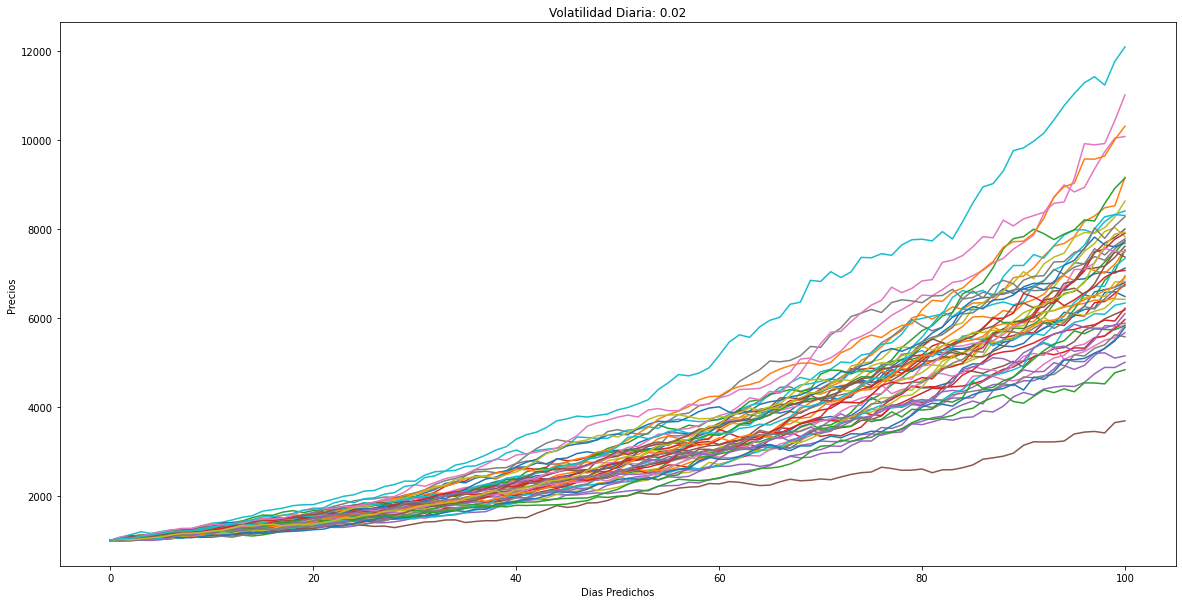

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



#--------------------------------------------------- Movimiento Browniano Geometrico  ------------------------------------------------


# So    :   Precio inicial
# dt    :   incremento del tiempo -> un dia en nuestro caso
# T     :   Horizonte de tiempo
# N     :   T/dt
# t     :   array de los puntos en el tiempo [1, 2, 3, .. , N]
# mu    :   media de los retornos diarios historicos
# sigma :   desviacion estandar de los retornos historicos diarios
# b     :   array para los incrementos brownianos
# W     :   array de la senda browniana


#  Asignación de parametros
So = 1000
dt = 1 # incremento de un dia  
T = 100 # numero de dias
N = T / dt
t = np.arange(1, int(N) + 1)
mu = 0.02
sigma = 0.02
scen_size = 50 


b = {str(scen): np.random.normal(0, 1, int(N)) for scen in range(1, scen_size + 1)}
W = {str(scen): b[str(scen)].cumsum() for scen in range(1, scen_size + 1)}

# Parametros de difusion y deriva (drift)
drift = (mu - 0.5 * sigma**2) * t

diffusion = {str(scen): sigma * W[str(scen)] for scen in range(1, scen_size + 1)}


# Simulaciones de nuestro activo y precio
S = np.array([So * np.exp(drift + diffusion[str(scen)]) for scen in range(1, scen_size + 1)]) 
S = np.hstack((np.array([[So] for scen in range(scen_size)]), S)) 


#  Grafico de las simulaciones
plt.figure(figsize = (20,10))
for i in range(scen_size):
    plt.title("Volatilidad Diaria: " + str(sigma))
    plt.plot(range(len(S[i,:])) ,S[i, :])
    plt.ylabel('Precios')
    plt.xlabel('Dias Predichos')
plt.show()



<p><a name="corr"></a></p>

# 5.0. Correlación

[Contenidos](#contents)

La correlación mide cómo el cambio en una variable está asociado con el cambio en otra variable se ubica en una escala de -1 a 1. Cuanto más cercano sea el valor de correlación a -1 o 1, más fuerte será la relación, y mientras más cerca de 0, más débil será la relación. .

Existen algunos tipos comunes de pruebas para medir la correlación, estos son: **Pearson**, **Spearman** y **Kendall**. 

* **Pearson**: ambas variables deben estar normalmente distribuidas. Otras suposiciones incluyen linealidad y homogeneidad en la varianza.

* **Kendall** es una prueba no paramétrica que no hace suposiciones sobre la distribución de los datos. Debe haber una relación monotónica entre las variables que se están probando y los datos deben medirse en una escala ordinal, de intervalo o de relación.

*  **Spearman** es no paramétrica y no hace suposiciones sobre la distribución de los datos. Al igual que en el caso anterior, debe haber una relación monotónica entre las variables y es el análisis de correlación apropiado cuando las variables se miden en una escala que es al menos ordinal.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("https://raw.githubusercontent.com/jisazac/pythonfinanzaseafit/master/SP_WEEKLY.csv",sep=";",decimal=",") 
df=df.iloc[:,0:200:10]


In [ ]:
#Aqui reemplazamos la columna Fecha por si misma pero en formato datetime
df.Dates=pd.to_datetime(df.Dates)

#El metodo index nos permite convertir una pseries del dataframe en el
# nuevo index del dataframe
df.set_index('Dates', inplace=True)
df.head()


,ADBE UW Equity,AFL UN Equity,ALL UN Equity,AMZN UW Equity,APTV UN Equity,BA UN Equity,BIIB UW Equity,BXP UN Equity,CCI UN Equity,CI UN Equity,CNC UN Equity,CPRT UW Equity,CXO UN Equity,DISCA UW Equity,DVA UN Equity,EL UN Equity,ETFC UW Equity,FAST UW Equity,FL UN Equity
Dates,,,,,,,,,,,,,,,,,,,
2014-03-01,59.16,33.075,53.33,396.44,49.6436,137.62,255.513,101.59,71.24,86.40,29.460,18.155,102.62,45.2503,64.47,73.65,20.30,46.49,41.25
2014-10-01,59.53,32.585,54.09,397.66,51.4863,141.90,275.695,104.44,71.85,89.21,30.115,18.155,98.90,42.9208,64.74,74.05,20.91,47.70,41.26
2014-01-17,61.37,32.355,52.90,399.61,52.5165,140.46,274.009,104.74,74.22,89.46,30.860,17.870,99.60,41.3321,64.83,72.57,21.02,47.61,38.89
2014-01-24,59.09,31.145,50.62,387.60,50.1880,136.65,279.646,104.89,71.37,86.70,30.740,17.355,96.89,40.3513,64.20,68.79,20.97,45.09,37.47
2014-01-31,59.19,31.390,51.20,358.69,51.0005,125.26,287.973,108.09,70.96,86.31,30.300,17.140,97.79,40.7549,64.93,68.74,20.02,43.93,38.60


In [ ]:
#Calculemos los  retornos porcentuales en dataframe df_rt
df_rt=df.pct_change().dropna()
df_rt.head()

,ADBE UW Equity,AFL UN Equity,ALL UN Equity,AMZN UW Equity,APTV UN Equity,BA UN Equity,BIIB UW Equity,BXP UN Equity,CCI UN Equity,CI UN Equity,CNC UN Equity,CPRT UW Equity,CXO UN Equity,DISCA UW Equity,DVA UN Equity,EL UN Equity,ETFC UW Equity,FAST UW Equity,FL UN Equity
Dates,,,,,,,,,,,,,,,,,,,
2014-10-01,0.006254,-0.014815,0.014251,0.003077,0.037119,0.031100,0.078986,0.028054,0.008563,0.032523,0.022234,0.000000,-0.036250,-0.051480,0.004188,0.005431,0.030049,0.026027,0.000242
2014-01-17,0.030909,-0.007058,-0.022000,0.004904,0.020009,-0.010148,-0.006115,0.002872,0.032985,0.002802,0.024739,-0.015698,0.007078,-0.037015,0.001390,-0.019986,0.005261,-0.001887,-0.057441
2014-01-24,-0.037152,-0.037398,-0.043100,-0.030054,-0.044338,-0.027125,0.020572,0.001432,-0.038399,-0.030852,-0.003889,-0.028819,-0.027209,-0.023730,-0.009718,-0.052088,-0.002379,-0.052930,-0.036513
2014-01-31,0.001692,0.007866,0.011458,-0.074587,0.016189,-0.083352,0.029777,0.030508,-0.005745,-0.004498,-0.014314,-0.012388,0.009289,0.010002,0.011371,-0.000727,-0.045303,-0.025726,0.030157
2014-07-02,0.062342,-0.001593,0.030469,0.006663,0.024963,0.014051,0.009275,0.010084,0.008455,-0.102422,0.012871,-0.010793,0.105839,0.037353,-0.020176,-0.032587,0.012488,0.006829,0.001813


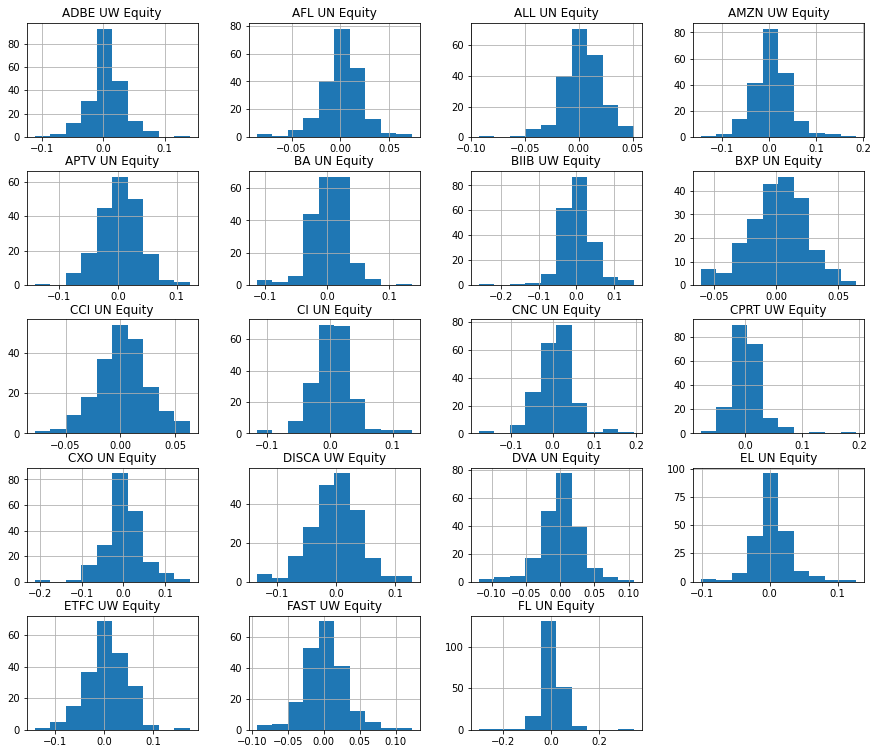

In [ ]:
df_rt.hist(figsize=(15,13))
plt.show()

En el caso de la correlación de Pearson, las suposiciones de normalidad de la distribución y homogeneidad de la varianza se pueden evaluar mediante las funciones `skewtest()` y `levene()`, respectivamente. Ambas pertenecientes al módulo `scipy.stats`. Evaluemos las suposiciones para las acciones `ALL UN Equity`, `AMZN UW Equity`

<AxesSubplot:xlabel='AMZN UW Equity', ylabel='ALL UN Equity'>

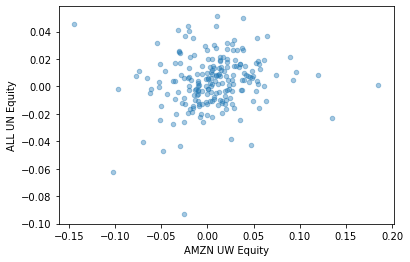

In [ ]:
# Veamos si existe una relacion lineal entre ambos activos
df_rt.plot(kind="scatter", y = 'ALL UN Equity', x = 'AMZN UW Equity', alpha = 0.4)

Para calcular el coeficiente de correlación podemos utilizar el método `corr()` de Pandas

In [ ]:
corr_p = df_rt.corr()
corr_k = df_rt.corr(method = "kendall")
corr_s = df_rt.corr(method = "spearman")

corr_p

,ADBE UW Equity,AFL UN Equity,ALL UN Equity,AMZN UW Equity,APTV UN Equity,BA UN Equity,BIIB UW Equity,BXP UN Equity,CCI UN Equity,CI UN Equity,CNC UN Equity,CPRT UW Equity,CXO UN Equity,DISCA UW Equity,DVA UN Equity,EL UN Equity,ETFC UW Equity,FAST UW Equity,FL UN Equity
ADBE UW Equity,1.000000,0.392104,0.231953,0.404738,0.415366,0.249711,0.224430,0.236504,0.299279,0.146571,0.257918,0.314719,0.133957,0.210722,0.272814,0.303546,0.332334,0.172445,0.101952
AFL UN Equity,0.392104,1.000000,0.477503,0.335169,0.492385,0.483246,0.263449,0.393457,0.264271,0.255107,0.104417,0.449031,0.276005,0.334257,0.263178,0.475043,0.463652,0.408720,0.183615
ALL UN Equity,0.231953,0.477503,1.000000,0.137926,0.308424,0.320567,0.102882,0.367819,0.270186,0.153784,0.119222,0.300644,0.178476,0.277824,0.127776,0.360384,0.301941,0.478962,0.217245
AMZN UW Equity,0.404738,0.335169,0.137926,1.000000,0.356332,0.310595,0.050056,0.192326,0.216641,0.117404,0.247430,0.299254,0.165657,0.186466,0.276242,0.243703,0.278390,0.056613,0.120365
APTV UN Equity,0.415366,0.492385,0.308424,0.356332,1.000000,0.352209,0.205312,0.236397,0.213703,0.249712,0.235272,0.402934,0.256797,0.312044,0.248060,0.373440,0.462185,0.288409,0.198847
BA UN Equity,0.249711,0.483246,0.320567,0.310595,0.352209,1.000000,0.261525,0.353092,0.207657,0.162153,0.139054,0.363460,0.283081,0.269523,0.222824,0.307983,0.389912,0.385572,0.126275
BIIB UW Equity,0.224430,0.263449,0.102882,0.050056,0.205312,0.261525,1.000000,0.293836,0.021833,0.281527,0.231481,0.275662,0.103129,0.146381,0.157358,0.156871,0.300984,0.232061,0.069947
BXP UN Equity,0.236504,0.393457,0.367819,0.192326,0.236397,0.353092,0.293836,1.000000,0.317815,0.210404,0.160638,0.250238,0.136085,0.249793,0.223986,0.285804,0.182296,0.235997,0.093736
CCI UN Equity,0.299279,0.264271,0.270186,0.216641,0.213703,0.207657,0.021833,0.317815,1.000000,-0.049828,0.103104,0.212826,0.175584,0.120754,0.142806,0.258086,0.012738,0.055199,-0.080773
CI UN Equity,0.146571,0.255107,0.153784,0.117404,0.249712,0.162153,0.281527,0.210404,-0.049828,1.000000,0.405920,0.232635,0.018392,0.158690,0.239107,0.214449,0.305154,0.153625,0.144701


Veamos cómo se correlaciona el activo `AMZN UW Equity` con los demás activos del dataframe

In [ ]:
corr_p['AMZN UW Equity'].sort_values(ascending=False)

AMZN UW Equity     1.000000
ADBE UW Equity     0.404738
APTV UN Equity     0.356332
AFL UN Equity      0.335169
BA UN Equity       0.310595
CPRT UW Equity     0.299254
ETFC UW Equity     0.278390
DVA UN Equity      0.276242
CNC UN Equity      0.247430
EL UN Equity       0.243703
CCI UN Equity      0.216641
BXP UN Equity      0.192326
DISCA UW Equity    0.186466
CXO UN Equity      0.165657
ALL UN Equity      0.137926
FL UN Equity       0.120365
CI UN Equity       0.117404
FAST UW Equity     0.056613
BIIB UW Equity     0.050056
Name: AMZN UW Equity, dtype: float64

Otra forma de verificar la correlación entre los atributos es usar el método `scatter_matrix`, que dibuja cada variable numérica contra cualquier otra variable numérica. Como tenemos 20 columnas (se generarían $20^2=400$ gráficos), grafiquemos solo algunos de los activos que tienen más correlación con Amazon:

array([[<AxesSubplot:xlabel='ADBE UW Equity', ylabel='ADBE UW Equity'>,
        <AxesSubplot:xlabel='APTV UN Equity', ylabel='ADBE UW Equity'>,
        <AxesSubplot:xlabel='AFL UN Equity', ylabel='ADBE UW Equity'>],
       [<AxesSubplot:xlabel='ADBE UW Equity', ylabel='APTV UN Equity'>,
        <AxesSubplot:xlabel='APTV UN Equity', ylabel='APTV UN Equity'>,
        <AxesSubplot:xlabel='AFL UN Equity', ylabel='APTV UN Equity'>],
       [<AxesSubplot:xlabel='ADBE UW Equity', ylabel='AFL UN Equity'>,
        <AxesSubplot:xlabel='APTV UN Equity', ylabel='AFL UN Equity'>,
        <AxesSubplot:xlabel='AFL UN Equity', ylabel='AFL UN Equity'>]],
      dtype=object)

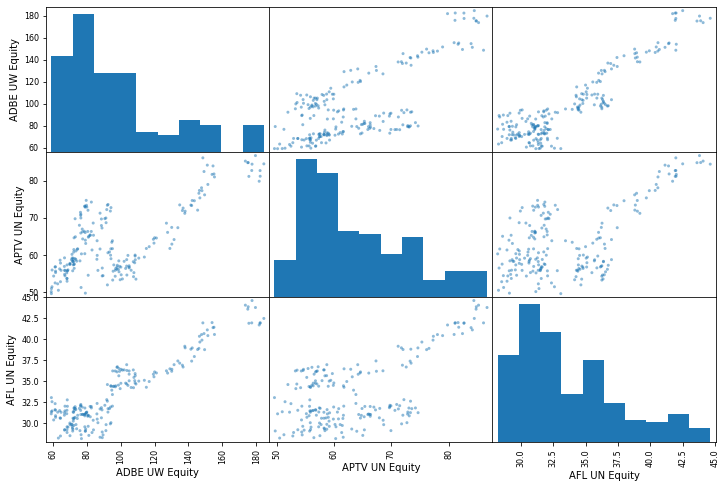

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["ADBE UW Equity","APTV UN Equity","AFL UN Equity"]

scatter_matrix(df[attributes], figsize=(12, 8))

La diagonal principal estaría llena de líneas rectas si Pandas dibujara cada variable contra sí misma, lo que no sería muy útil. En su lugar, Pandas muestra un histograma de cada atributo.

La librería `seaborn` nos permite realizar gráficos como el anterior o, por ejemplo, en un mapa de calor, mediante las funciones `pairplot()` y `heatmap()`, respectivamente.

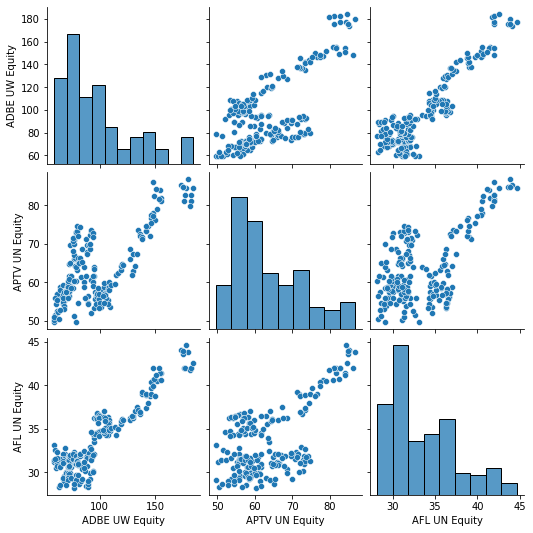

In [ ]:
import seaborn as sns
sns.pairplot(df,  vars = ["ADBE UW Equity","APTV UN Equity","AFL UN Equity"])

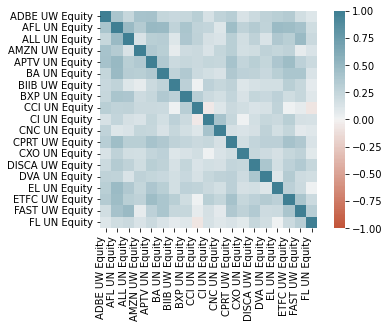

In [ ]:
corr_new = df_rt.corr()

ax = sns.heatmap(
    corr_new, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

# 6.0. Estimacion de Matrices de Covarianza Robustas



Una estimación exitosa de la volatilidad permite una modelación acertada de los retornos sin embargo esta estimación no está exenta de retos





## 6.1 Midiendo la Volatilidad

Una medida acertada de volatilidas requiere que esta sea forward-looking y predicitva para posibilitar decisiones adecudas. 

Desafortunadamente, tomar simplemnte la desviacion estandar de los retornos de un activo no alcanza a incorporar una capa de robustez ante el futuro. Y este problema solo se omplica al incluir mas activos en nuestra canasta.

Para modelar cambios globales en un portafolio es importante considerar no solo la volatilidad de cada activo individual sino tambien las covarianzas presentes entre ellos.

Lo ideal seria tener en un portafolio un conjunto de activos independientes ya que tienen un impacto menor sobre la volatilidad del portafolio gracias a la diversificación que brindan.


### Covarianza

La covarianza es una medida de la variabilidad conjunta de dos vaiables aleatorias. Cuando un conjunto de variables aleatorias exhiben un comportamiento similar tienden a tener una covarianza alta entre sí. 
Matematicamente podemos expresar la covarianza de  X with respecto a Y así:

$$ COV(X, Y) = E[(X - E[X])(Y - E[Y])]$$

Notese que al tomar la covarianza de $X$ consigo misma obtenemos:

$$ COV(X, X) = E[(X - E[X])(X - E[X])] = E[(X - E[X])^2] = VAR(X) $$

Si dos activos tienen una alta covarianza se comportaran generalmente de la misma manera, activos con alta covarianza pueden practicamnte reemplazarse entre sí.

Las matrices de covarianza son la espina dorsal de la teria Moderna de Portafolios (MPT). La **MPT** se enfoca en maximizar los retornos para un nivel dado de riesgo haciendo fundamental tener plena confianza en los metodos que utlizamos para estimar dicho riesgo. 

Vamos a utilizar las covarianzas principalmente para cuantificar riesgos conjuntos.

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import covariance

Calculemos la covarianza de dos variables intimamente relacionadas, $X$ y $Y$. Sea $X$ generada de forma aleatoria y $Y =  8X + \epsilon$, donde $\epsilon$ es un termino de perturbación estocastico. Podemos calcular la covarinza utilizando con la formula previamente elaborada para ver un mejor panorama de como $X$ evoluciona junto  a $Y$

In [ ]:
# Generamos valores aleatorios de x 
X = np.random.normal(size = 1000)
#Generamos nuestro epsilon de perturbacion estocastica
epsilon = np.random.normal(0.001, 1, size = len(X))
#Generamos Y
Y = 8*X + epsilon
#Calculamos la covarianza de forma extensiva
product = (X - np.mean(X))*(Y - np.mean(Y))
expected_value = np.mean(product)
print("Cov(X,Y): ",expected_value)

Cov(X,Y):  7.364894173618167


In [ ]:
# Una implementación mas directa
np.cov([X, Y])

array([[ 1.00316059,  7.77030239],
       [ 7.77030239, 74.73607276]])

Esta funcion nos retorna la matriza de covarianza entre  $X$ y $Y$. Con las respectivas varianzas en la diagonal y los indices  $(i, j)$ haciendo referencia a las covarianzas de los distintos activos indexados en $i$ y $j$.

Veamos un grafico de dispersion entre  $X$ y $Y$ con una linea de ajuste en la mitad

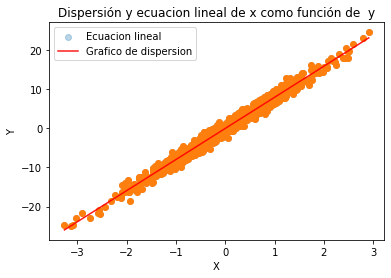

In [ ]:
# Grafico de dispersion de  X y y
from statsmodels import regression
import statsmodels.api as sm
def linreg(X,Y):
    # Ejecutamos una regresión lineal OLS
    X = sm.add_constant(X)
    model = regression.linear_model.OLS(Y, X).fit()
    a = model.params[0]
    b = model.params[1]
    X = X[:, 1]

    # Recuperamos los summary de la regresión
    X2 = np.linspace(X.min(), X.max(), 100)
    Y_hat = X2 * b + a
    plt.scatter(X, Y, alpha=0.3) 
    plt.plot(X2, Y_hat, 'r', alpha=0.9); 
    plt.xlabel('X Value')
    plt.ylabel('Y Value')
    return model.summary()

linreg(X, Y)
plt.scatter(X, Y)
plt.title('Dispersión y ecuacion lineal de x como función de  y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['Ecuacion lineal', 'Grafico de dispersion']);

### Ejercicio 10

Vuelva a graficar el grafico anterior modificando los parametros de $\epsilon$ a una media de 0.001 y una desviacion estandar de 1

In [ ]:
df_rt

,ADBE UW Equity,AFL UN Equity,ALL UN Equity,AMZN UW Equity,APTV UN Equity,BA UN Equity,BIIB UW Equity,BXP UN Equity,CCI UN Equity,CI UN Equity,CNC UN Equity,CPRT UW Equity,CXO UN Equity,DISCA UW Equity,DVA UN Equity,EL UN Equity,ETFC UW Equity,FAST UW Equity,FL UN Equity
Dates,,,,,,,,,,,,,,,,,,,
2014-10-01,0.006254,-0.014815,0.014251,0.003077,0.037119,0.031100,0.078986,0.028054,0.008563,0.032523,0.022234,0.000000,-0.036250,-0.051480,0.004188,0.005431,0.030049,0.026027,0.000242
2014-01-17,0.030909,-0.007058,-0.022000,0.004904,0.020009,-0.010148,-0.006115,0.002872,0.032985,0.002802,0.024739,-0.015698,0.007078,-0.037015,0.001390,-0.019986,0.005261,-0.001887,-0.057441
2014-01-24,-0.037152,-0.037398,-0.043100,-0.030054,-0.044338,-0.027125,0.020572,0.001432,-0.038399,-0.030852,-0.003889,-0.028819,-0.027209,-0.023730,-0.009718,-0.052088,-0.002379,-0.052930,-0.036513
2014-01-31,0.001692,0.007866,0.011458,-0.074587,0.016189,-0.083352,0.029777,0.030508,-0.005745,-0.004498,-0.014314,-0.012388,0.009289,0.010002,0.011371,-0.000727,-0.045303,-0.025726,0.030157
2014-07-02,0.062342,-0.001593,0.030469,0.006663,0.024963,0.014051,0.009275,0.010084,0.008455,-0.102422,0.012871,-0.010793,0.105839,0.037353,-0.020176,-0.032587,0.012488,0.006829,0.001813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-12,-0.026781,0.030588,0.040573,-0.019941,0.026274,0.020686,0.033595,0.015740,-0.001508,0.038933,0.040445,0.012953,0.006260,0.112000,0.069291,-0.011253,0.089592,0.063379,0.080050
2017-08-12,-0.033144,0.006393,-0.005820,-0.000301,-0.017051,0.053504,0.020103,-0.019429,-0.027099,0.007485,0.002374,0.022088,-0.008836,0.010277,0.108002,0.006893,0.030477,0.030663,0.038328
2017-12-15,0.022700,0.012477,0.014341,0.014750,-0.009622,0.028122,0.006661,0.038104,0.010502,-0.027766,-0.063943,0.003412,-0.027174,0.070193,0.041501,0.031760,-0.009925,-0.009297,0.015121


## 6.2. La matriz de covarianza

Si tomamos la covarianza entre  $N$ activos obtendremos una matriz de covarianza con dimensiones  $N x N$. T

$$ \Sigma = \left[\begin{matrix}
VAR(X_1) & COV(X_1, X_2) & \cdots & COV(X_1, X_N) \\
COV(X_2, X_0) & VAR(X_2) & \cdots & COV(X_2, X_N) \\
\vdots & \vdots & \ddots & \vdots \\
COV(X_N, X_1) & COV(X_N, X_2) & \cdots & VAR(X_N)
\end{matrix}\right] $$  



In [ ]:
# Ejemplo para una matriz de 4 activos

df_rt_4=df_rt[['ADBE UW Equity', 'AFL UN Equity', 'ALL UN Equity', 'AMZN UW Equity']]
print ('Matriz de covarianzas')
print( df_rt_4.cov())

Matriz de covarianzas
                ADBE UW Equity  AFL UN Equity  ALL UN Equity  AMZN UW Equity
ADBE UW Equity        0.000947       0.000246       0.000138        0.000484
AFL UN Equity         0.000246       0.000416       0.000188        0.000266
ALL UN Equity         0.000138       0.000188       0.000373        0.000104
AMZN UW Equity        0.000484       0.000266       0.000104        0.001512


### Ejercicio 11


Calcule matriz de varianzas y covarianzas para 6 activos utilizando información de la ultimas 52 semanas en el dataframe df_rt 

In [ ]:
# Desarrolle aqui el ejercicio
df_rt_6=df_rt[['ADBE UW Equity', 'AFL UN Equity', 'ALL UN Equity', 'AMZN UW Equity','DVA UN Equity','FL UN Equity']]
df_rt_6_1= df_rt_6.tail(52)
print(df_rt_6_1.cov())

                ADBE UW Equity  AFL UN Equity  ALL UN Equity  AMZN UW Equity  \
ADBE UW Equity        0.000753      -0.000041      -0.000015        0.000200   
AFL UN Equity        -0.000041       0.000175       0.000030        0.000023   
ALL UN Equity        -0.000015       0.000030       0.000264       -0.000035   
AMZN UW Equity        0.000200       0.000023      -0.000035        0.000731   
DVA UN Equity         0.000180      -0.000019      -0.000070        0.000238   
FL UN Equity         -0.000110       0.000109       0.000313        0.000100   

                DVA UN Equity  FL UN Equity  
ADBE UW Equity       0.000180     -0.000110  
AFL UN Equity       -0.000019      0.000109  
ALL UN Equity       -0.000070      0.000313  
AMZN UW Equity       0.000238      0.000100  
DVA UN Equity        0.001489      0.000543  
FL UN Equity         0.000543      0.006348  


## ¿ Es esta la mejor manera de hacerlo?  

Estimar la matriz de covarianzas es una tares crtica y por tanto vale la pena preguntarse si confiamos en las relaciones estadisticas subyacentes esta revela de nuestros activos.

Desafortunadamente la forma mas obvia de calcular una matriz de covarianza, **la covarianza muestral**, es notoriamente inestable.

### Propagación de Errores

- Propagación del error en la suma

$z=x+y \rightarrow \left | E_{z} \right | \leq \left | E_{x} \right |+\left | E_{y} \right |$

- Propagación del error en el producto

$z=x \cdot y \rightarrow \left | E_{z} \right | \leq x\left | E_{x} \right |+y\left | E_{y} \right |$

Si tenemos menos observaciones en el tiempo que numero de activos ($T < N$), las estiamciones se vuelven poco confiables ya que se hacen mas reactivos a los valores extremos.

La solucion a estos casos es la formulacion robusta de la matriz de varianzas y covarianzas, es decir una matriz capaz de de capturar las relaciones existentes entre los activos que sea simultaneamente estable. 

Para eso usaremos un estimador de encogimiento.

## 6.3 Estimadores de Encogimiento

Este concept surge de la necesdiad de obtener matrices de covarianza estables. "Encogemos" una matriz al reducir los valores extremos acercandolos al centro. En un sentido páctico, tomamos una combinación lienal de la mtriz de covarianzas y una matriz constante representando el centro de la matriz .

Dada una matriz de covarianzas, $\textbf{S}$, la varianza promedio, $\mu$, y al constante de encogimiento $\delta$, la matriz encogida estimada  es:   

$$(1 - \delta)\textbf{S} + \delta\mu\textbf{1}$$  
 
Restringiendo $\delta$ tal que $0 \leq \delta \leq 1$ vemos que obtenemos un promedio ponderado de la matriz de coarianza muestral y su media. El valor optimo de  $\delta$ que vamos a utilizar es el definido en la formulación de  h Ledoit and Wolf.

## Estimador de Ledoit-Wolf .

En [su paper](http://ledoit.net/honey.pdf), Ledoit y Wolf  proponen un  $\delta$ óptimo: 

$$\hat\delta^* \max\{0, \min\{\frac{\hat\kappa}{T},1\}\}$$

La implementacion puede ser extraida directamente de   `scikit-learn` .

In [ ]:
## Calculando la matriz de df_rt_4 usando metodo de Ledoit-Wolf
cov_lw = covariance.ledoit_wolf(df_rt_4)[0]
print(cov_lw)

[[9.30852499e-04 2.24047831e-04 1.25377387e-04 4.40715335e-04]
 [2.24047831e-04 4.48005813e-04 1.71144484e-04 2.42000280e-04]
 [1.25377387e-04 1.71144484e-04 4.08174441e-04 9.42062362e-05]
 [4.40715335e-04 2.42000280e-04 9.42062362e-05 1.44505175e-03]]


### Calculando los errores de estimación

Podemos cauntificar las diferenias entre la amtriz tradicional y aquella obtenida a partir de la estimación robuta así:


$$ \frac{1}{n} \sum_{i=1}^{n} |a_i - b_i| $$



In [ ]:
lw_errors = sum(abs(np.subtract(df_rt_4.cov().values, cov_lw)))
print ("Error promedio: ", np.mean(lw_errors))

Error promedio:  0.00040665371399791243


### Ejercicio 12


Calcule la matriz de varianzas y covarianzas para 20 activos utilizando información de la ultimas 52 semanas en el dataframe df_rt primero con la metodologi muestral y luego con la metodologia robusta.

Una vez hecho esto calcule el error promedio de estimación entre ambas matrices

# 7.0 Series de Tiempo

Una serie de tiempo es una sucesión ordenada de
observaciones de una variable aleatoria. Generalmente, el ordenamiento se hace a través del tiempo y las observaciones se hacen en intervalos de tiempo igualmente espaciados.

Las series de tiempo pueden ser:

- Discretas: Son observadas en intervalos específicos de tiempo: horas, días,
semanas, meses, trimestres, años, etc. Por ejemplo, el precio diario de las
acciones de una compañía, es una serie de tiempo discreta.

- Continuas: Son observadas en forma continua en el tiempo. Por ejemplo, la serie de tiempo de la intensidad y duración de las ondas sísmicas observadas en un lapso de tiempo, cuyo registro gráfico es llamado un sismograma, es una serie de tiempo continua.



Los objetivos principales del estudio de las series de tiempos son:

- Comprender y describir el mecanismo que genera las observaciones.
- Pronosticar valores futuros.

**Una serie de tiempo es una trayectora de un proceso estocastico**

La naturaleza intrínseca de las series de tiempo implica que sus observaciones son **dependientes o correlacionadas,** y por tanto el orden de las mediciones es importante. Las técnicas estadísticas que se basan en muestras aleatorias (independencia de las observaciones) no son aplicables en
el análisis y se necesita construir nuevos métodos.

## Veamos algunos ejemplos 

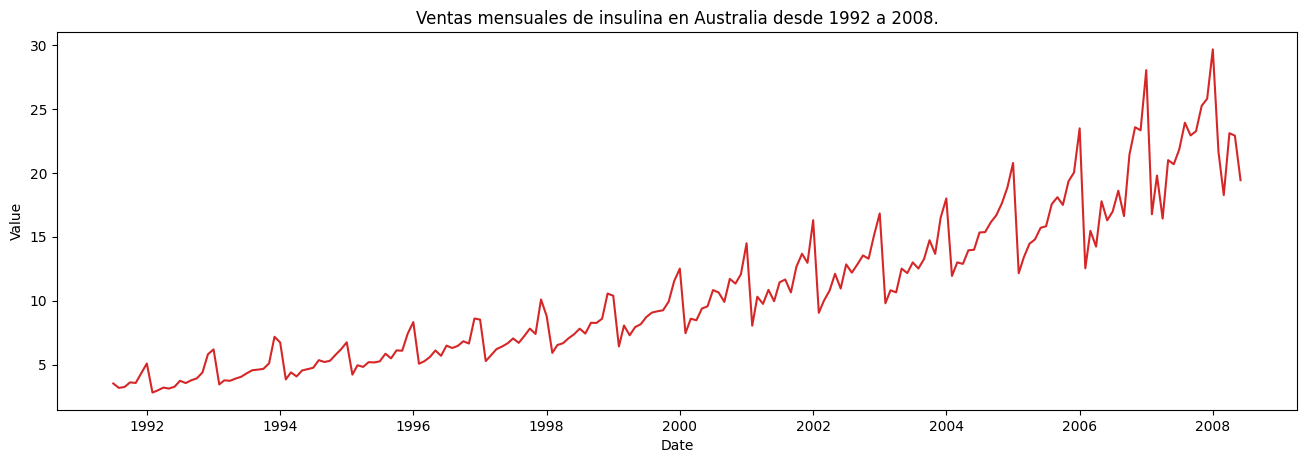

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.value, title='Ventas mensuales de insulina en Australia desde 1992 a 2008.')    

**No tiene estacionareidad y si estacionalidad**

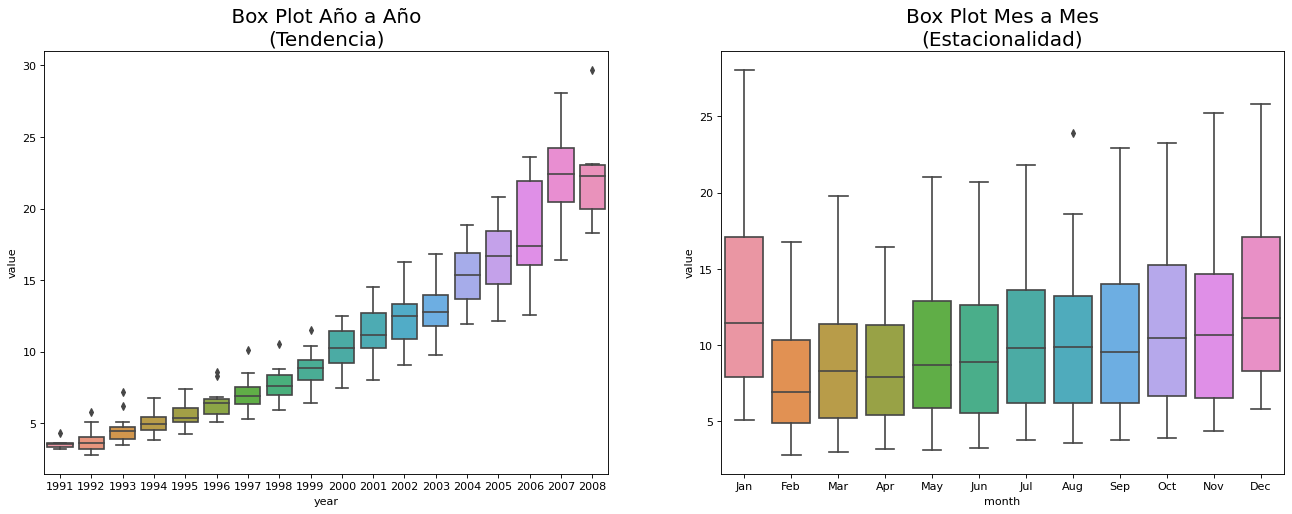

In [ ]:
# Importamos la data
import seaborn as sns
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

# Preparamos la data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Graficas
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :])

# Configuramos las etiquetas
axes[0].set_title(' Box Plot Año a Año \n(Tendencia)', fontsize=18); 
axes[1].set_title('Box Plot Mes a Mes\n(Estacionalidad)', fontsize=18)
plt.show()

## 7.1. Componentes de una serie de tiempo

Casi toda serie de tiempo se puede descomponer  como una garegción de los siguientes componentes: Nivel + Tendencia + Estacionalidad + Error



<AxesSubplot:title={'center':'Tendencia y Estacionalidad'}, xlabel='date'>

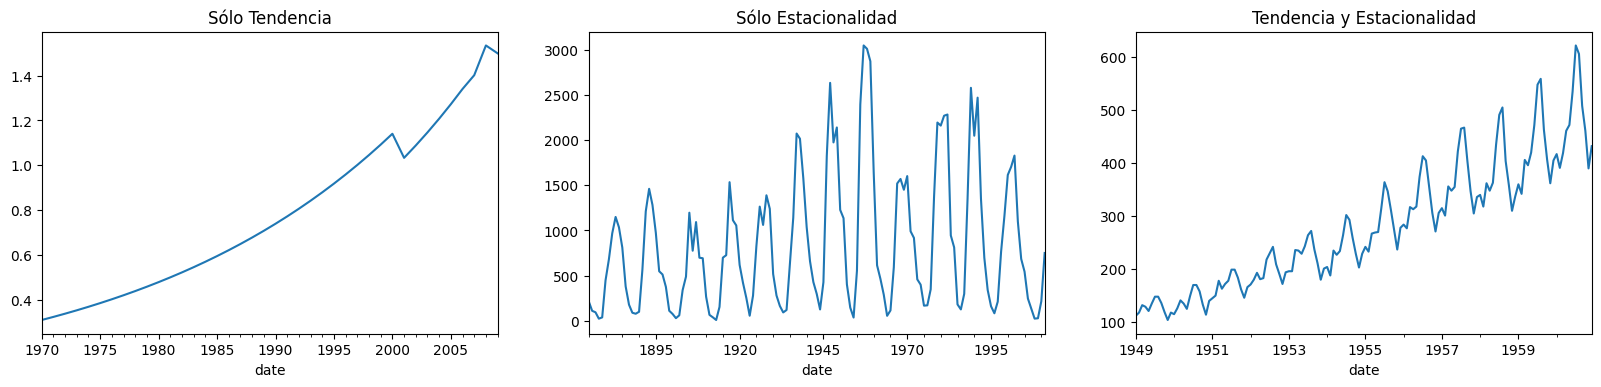

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(20,4), dpi=100)
pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/guinearice.csv', parse_dates=['date'], index_col='date').plot(title='Sólo Tendencia', legend=False, ax=axes[0])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv', parse_dates=['date'], index_col='date').plot(title='Sólo Estacionalidad', legend=False, ax=axes[1])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/AirPassengers.csv', parse_dates=['date'], index_col='date').plot(title='Tendencia y Estacionalidad', legend=False, ax=axes[2])

Dependiendo de la naturaleza de la tendencia y la estacionalidad una serie de tiempo puede ser mdelada como aditiva o multiplicativa:

**Serie de tiempo aditiva**:

Valor =  Nivel + Tendencia + Estacionalidad + Error

**Serie de Tiempo multiplicativa**:

Valor = Nivel x Tendencia x Estacionalidad x Error

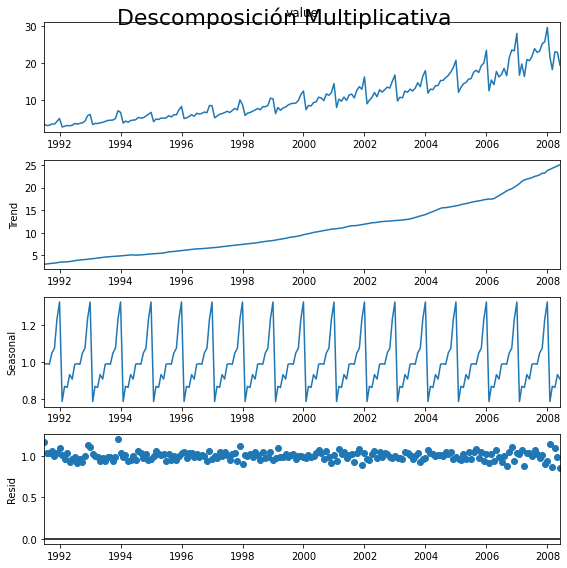

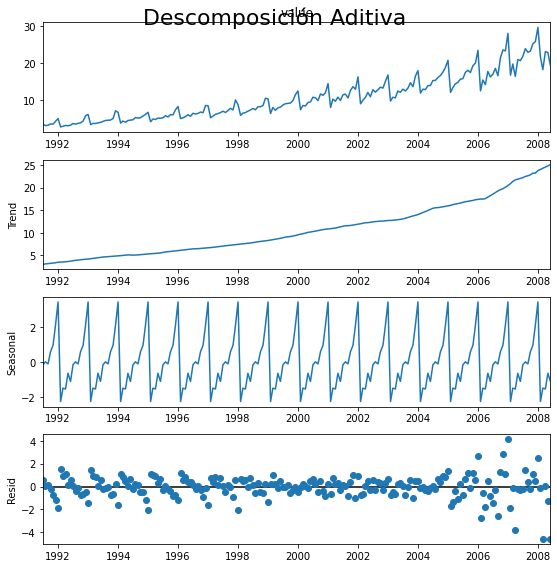

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Importar data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Descomposición Multiplicativa 
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Descomposición Aditiva
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')

# Grafico
plt.rcParams.update({'figure.figsize': (8,8)})
result_mul.plot().suptitle('Descomposición Multiplicativa', fontsize=22)
result_add.plot().suptitle('Descomposición Aditiva', fontsize=22)
plt.show()

Se define si es addtivio o multiplicativo se define gracais a la varianza 

## 7.2. Series Estacionarias

Una serie de tiempo  $Z_{t}$ es llamada estrictamente estacionaria si el proceso estocástico que la origina es tal que sus propiedades no se afectan debido a un
cambio en el período de origen.

Esto significa que la función de distribución conjunta de cualquier subconjunto de variables aleatorias del proceso es
invariante a su desplazamiento hacia adelante o hacia atrás por un mismo número de períodos. Dos propiedades se derivan de esta definicón:

- La media de la serie de tiempo es constante en el tiempo

- La varianza de la serie de tiempo tambien se mantiene  constante en el tiempo

<AxesSubplot:title={'center':'Retornos Semanales'}>

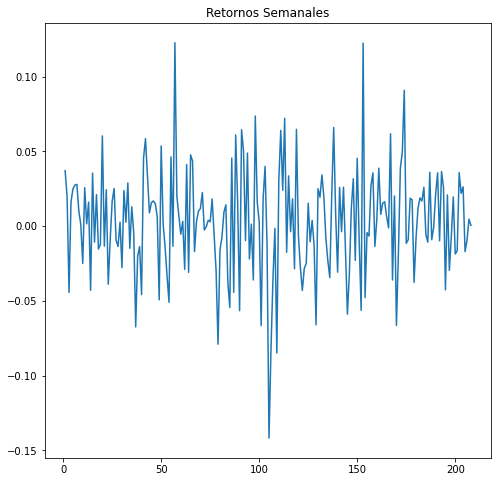

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("https://raw.githubusercontent.com/jisazac/pythonfinanzaseafit/master/SP_WEEKLY.csv",sep=";",decimal=",") 
df=df.iloc[:,0:200:10]


df.iloc[:,5].pct_change().plot(title="Retornos Semanales")

### ¿Cómo podemos determinar la estacionariedad de una serie?

La estrategia cuantitativa consiste en pruebas de **raíz unitaria**, las mas utilizadas son:

- Augmented Dickey Fuller test (ADH Test)
- Kwiatkowski-Phillips-Schmidt-Shin – KPSS test 
- Philips Perron test (PP Test)

Estos tests nos permiten determinar si nuestra serie de tiempo es estacionaria o no.

En el caso de la prueba ADF tenemos que:

- Hipotesis nula: La serie tiene raiz unitaria (no es estacionaria)

- Si se rechaza entonces la serie es estacionaria. Utilizamos como criterio de decision el p-value de la prueba


La intepretacion de la pruba KPSS es exactamente la opuesta

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(df.iloc[:,5].pct_change().dropna().values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(df.iloc[:,5].pct_change().dropna().values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critical Values:')
    print(f'   {key}, {value}')

ADF Statistic: -14.631743638387858
p-value: 3.742524185134334e-27
Critical Values:
   1%, -3.4623415245233145
Critical Values:
   5%, -2.875606128263243
Critical Values:
   10%, -2.574267439846904

KPSS Statistic: 0.071334
p-value: 0.100000
Critical Values:
   10%, 0.347
Critical Values:
   5%, 0.463
Critical Values:
   2.5%, 0.574
Critical Values:
   1%, 0.739


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




In [ ]:
df


,Dates,ADBE UW Equity,AFL UN Equity,ALL UN Equity,AMZN UW Equity,APTV UN Equity,BA UN Equity,BIIB UW Equity,BXP UN Equity,CCI UN Equity,CI UN Equity,CNC UN Equity,CPRT UW Equity,CXO UN Equity,DISCA UW Equity,DVA UN Equity,EL UN Equity,ETFC UW Equity,FAST UW Equity,FL UN Equity
0,03/01/2014,59.16,33.075,53.33,396.44,49.6436,137.62,255.513,101.59,71.24,86.40,29.460,18.155,102.62,45.2503,64.47,73.65,20.30,46.49,41.25
1,10/01/2014,59.53,32.585,54.09,397.66,51.4863,141.90,275.695,104.44,71.85,89.21,30.115,18.155,98.90,42.9208,64.74,74.05,20.91,47.70,41.26
2,17/01/2014,61.37,32.355,52.90,399.61,52.5165,140.46,274.009,104.74,74.22,89.46,30.860,17.870,99.60,41.3321,64.83,72.57,21.02,47.61,38.89
3,24/01/2014,59.09,31.145,50.62,387.60,50.1880,136.65,279.646,104.89,71.37,86.70,30.740,17.355,96.89,40.3513,64.20,68.79,20.97,45.09,37.47
4,31/01/2014,59.19,31.390,51.20,358.69,51.0005,125.26,287.973,108.09,70.96,86.31,30.300,17.140,97.79,40.7549,64.93,68.74,20.02,43.93,38.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,01/12/2017,179.52,43.800,103.10,1162.35,86.6983,271.38,319.350,127.13,112.55,208.41,101.100,43.010,141.46,19.4600,61.11,124.77,48.89,52.18,43.31
205,08/12/2017,173.57,44.080,102.50,1162.00,85.2200,285.90,325.770,124.66,109.50,209.97,101.340,43.960,140.21,19.6600,67.71,125.63,50.38,53.78,44.97
206,15/12/2017,177.51,44.630,103.97,1179.14,84.4000,293.94,327.940,129.41,110.65,204.14,94.860,44.110,136.40,21.0400,70.52,129.62,49.88,53.28,45.65
207,22/12/2017,175.00,43.605,104.11,1168.36,84.7900,295.10,319.500,127.34,108.55,203.39,102.160,43.350,151.77,23.7300,71.98,127.75,49.71,54.05,47.26


## Ejercicio 13
Usando nuestra base de datos SP_WEEKLY.csv busque la acción de amazon, grafique la serie de tiempo de su precio y realice la prueba de ADF. Es la serie de precios estacionaria o no?

Haga luego la grafica de sus retorno acumulado (aditivo) 

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(df.loc[:,"AMZN UW Equity"].pct_change().dropna().values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(df.iloc[:,5].pct_change().dropna().values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critical Values:')
    print(f'   {key}, {value}')

ADF Statistic: -14.038919000405096
p-value: 3.3305264808514336e-26
Critical Values:
   1%, -3.4623415245233145
Critical Values:
   5%, -2.875606128263243
Critical Values:
   10%, -2.574267439846904

KPSS Statistic: 0.071334
p-value: 0.100000
Critical Values:
   10%, 0.347
Critical Values:
   5%, 0.463
Critical Values:
   2.5%, 0.574
Critical Values:
   1%, 0.739


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




## 7.2. Métodos de suavización

La suavización de una serie de tiempo puede servir para:

- Reducir el effecto del ruido sobre la serie

- La versión suavizada permite explicar mejor la serie original 

- Permite visualizar mejor la tendencia 

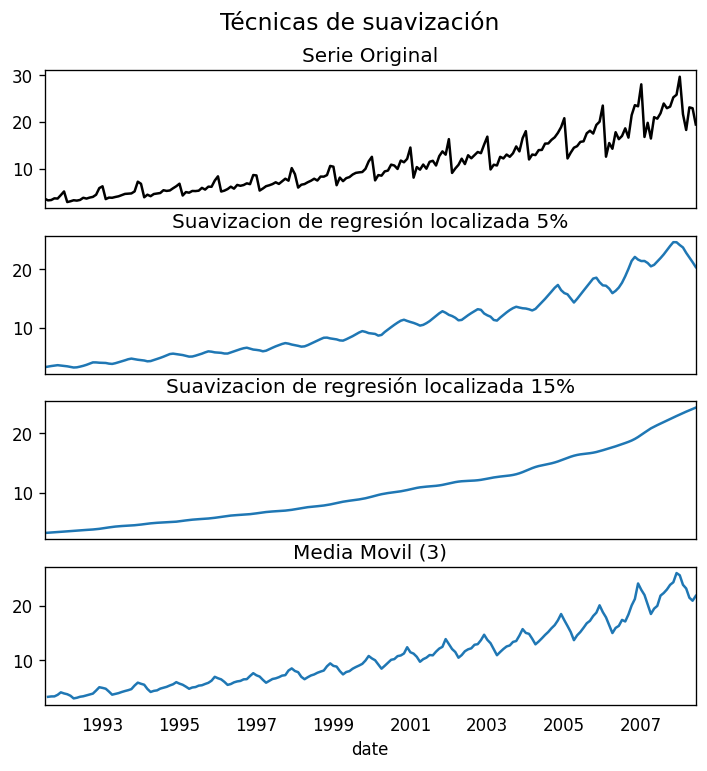

In [ ]:
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

# Import
df_orig = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# 1. Suavización con medias moviles
df_ma = df_orig.value.rolling(3, center=True, closed='both').mean()

# 2. Loess Smoothing (5% and 15%) (Regresión Localizada)
df_loess_5 = pd.DataFrame(lowess(df_orig.value, np.arange(len(df_orig.value)), frac=0.05)[:, 1], index=df_orig.index, columns=['value'])
df_loess_15 = pd.DataFrame(lowess(df_orig.value, np.arange(len(df_orig.value)), frac=0.15)[:, 1], index=df_orig.index, columns=['value'])

# Grafica
fig, axes = plt.subplots(4,1, figsize=(7, 7), sharex=True, dpi=120)
df_orig['value'].plot(ax=axes[0], color='k', title='Serie Original')
df_loess_5['value'].plot(ax=axes[1], title='Suavizacion de regresión localizada 5%')
df_loess_15['value'].plot(ax=axes[2], title='Suavizacion de regresión localizada 15%')
df_ma.plot(ax=axes[3], title='Media Movil (3)')
fig.suptitle('Técnicas de suavización', y=0.95, fontsize=14)
plt.show()

## 7.3 Modelos Autoregresivos
Son aquellos modelos que tienen como representación el siguiente polinomio de rezagos:

$y_{t}=\delta+\phi_{1}y_{t-1}+\phi_{2}y_{t-2}+..+\phi_{p}y_{t-p}+\varepsilon_{t}$

Que puede extenderse para incluir un componente estacional y variables exogenas adicionales así:

$y_{t}=\delta+\phi_{1}y_{t-1}+\phi_{2}y_{t-2}+..+\phi_{p}y_{t-p}+\sum_{i}^{s-1}\gamma_{i}d_{i}+\sum_{i}^{m}\kappa_{j}x_{t,j}+\varepsilon_{t}$

In [ ]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr
import seaborn as sns
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.api import acf, pacf, graphics

In [1]:
sns.set_style('darkgrid')
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc('figure',figsize=(16, 6))

NameError: ignored

La siguiente serie contiene el crecimiento mes a mes de compra de vivienda en Estados Unidos. Notese la fuerte estacionalidad presente en el serie. Ajustamos la frecuencia a “MS” (month-start).

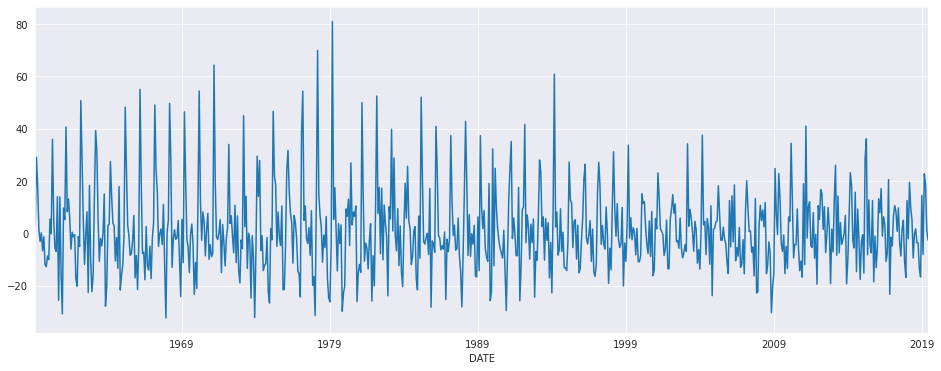

In [ ]:
data = pdr.get_data_fred('HOUSTNSA', '1959-01-01', '2019-06-01')
housing = data.HOUSTNSA.pct_change().dropna()
# Multiplicamos por 100 para trabajar con porcentajes
housing = 100 * housing.asfreq('MS')
fig, ax = plt.subplots()
ax = housing.plot(ax=ax)

In [ ]:
# Veamos como nos va con un modelo AR(3) sencillo
mod = AutoReg(housing, 3, old_names=False)
res = mod.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:               HOUSTNSA   No. Observations:                  725
Model:                     AutoReg(3)   Log Likelihood               -2993.442
Method:               Conditional MLE   S.D. of innovations             15.289
Date:                Fri, 10 Mar 2023   AIC                           5996.884
Time:                        01:39:59   BIC                           6019.794
Sample:                    05-01-1959   HQIC                          6005.727
                         - 06-01-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.1228      0.573      1.961      0.050       0.000       2.245
HOUSTNSA.L1     0.1910      0.036      5.235      0.000       0.120       0.263
HOUSTNSA.L2     0.0058      0.037      0.155    

In [ ]:
#Veamos un AR(13)
sel = ar_select_order(housing, 13, old_names=False)
sel.ar_lags
res = sel.model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:               HOUSTNSA   No. Observations:                  725
Model:                    AutoReg(13)   Log Likelihood               -2676.157
Method:               Conditional MLE   S.D. of innovations             10.378
Date:                Fri, 10 Mar 2023   AIC                           5382.314
Time:                        01:45:56   BIC                           5450.835
Sample:                    03-01-1960   HQIC                          5408.781
                         - 06-01-2019                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.3615      0.458      2.970      0.003       0.463       2.260
HOUSTNSA.L1     -0.2900      0.036     -8.161      0.000      -0.360      -0.220
HOUSTNSA.L2     -0.0828      0.031     -2.65

El metodo plot_predict() nos permite visualizar los pronosticos. 

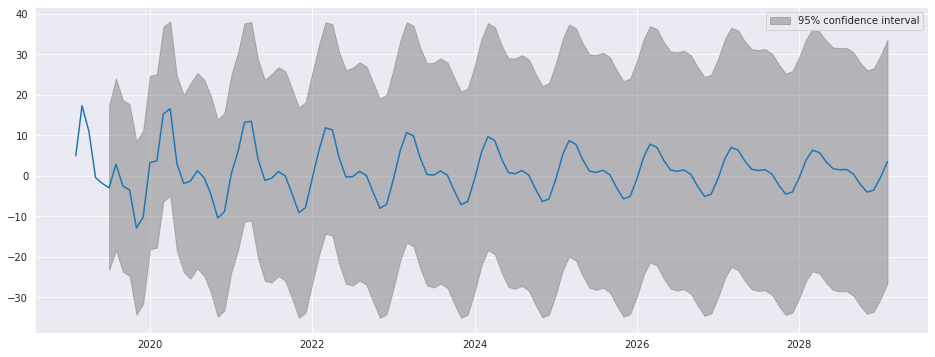

In [ ]:
fig = res.plot_predict(720, 840) #start= 720, end=820

El metodo plot_diagnositcs nos permite ver diagnosticos basicos de nuestro modelo y la data

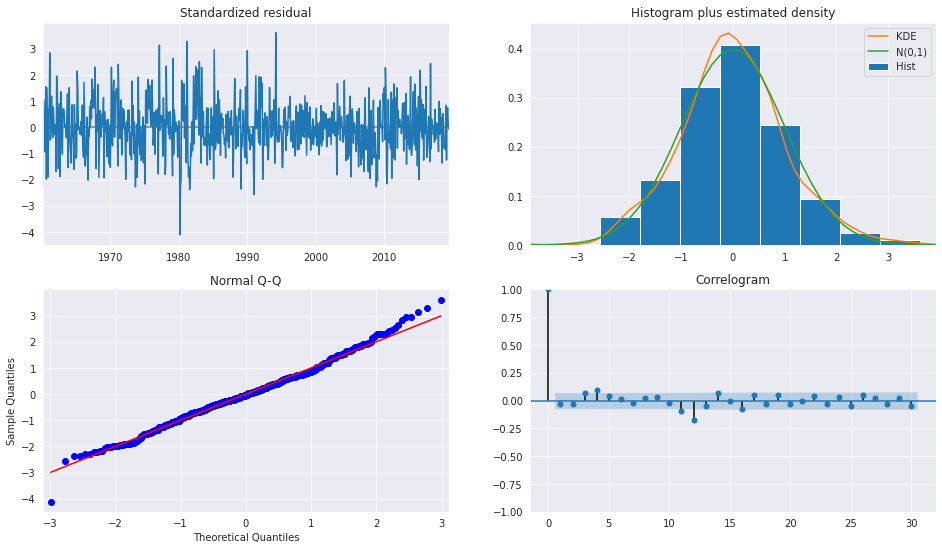

In [ ]:
fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

## 7.4 Modelos ARMA
Una modelo ARMA modela una serie de tiempo con la siguiente especificacion del polinomio de rezagos

$y_{t}=\delta+\phi_{1}y_{t-1}+\phi_{2}y_{t-2}+..+\phi_{p}y_{t-p}+\theta_{1}\varepsilon_{t-1}+\theta_{2}\varepsilon_{t-2}+..+\theta_{q}\varepsilon_{t-q}+\varepsilon_{t}$

In [ ]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

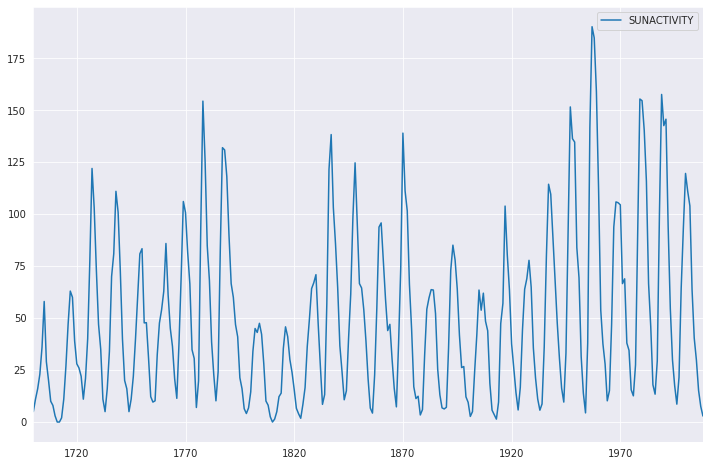

In [ ]:
dta = sm.datasets.sunspots.load_pandas().data
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]
dta.plot(figsize=(12,8))

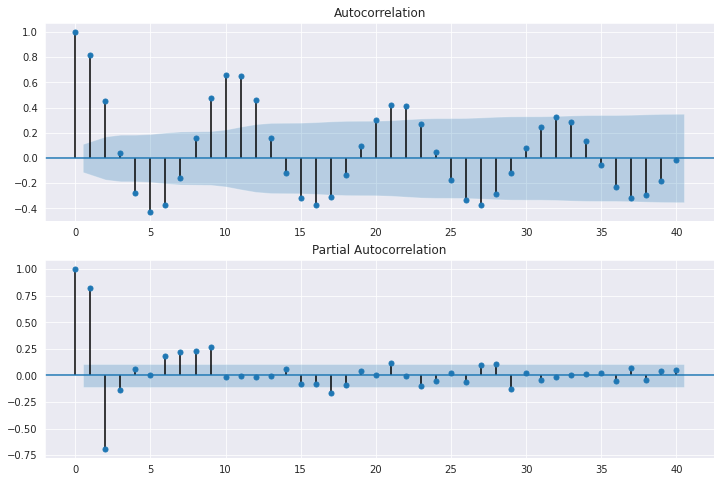

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)

In [ ]:
# Veamos un modelo ARMA (2,0)
arma_mod_2_0 = ARIMA(dta, order=(2, 0, 0)).fit()
#print(arma_mod20.params)
print(arma_mod_2_0.summary())

                               SARIMAX Results                                
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1307.319
Date:                Sat, 12 Sep 2020   AIC                           2622.637
Time:                        12:18:20   BIC                           2637.570
Sample:                    12-31-1700   HQIC                          2628.607
                         - 12-31-2008                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.7462      3.938     12.631      0.000      42.027      57.465
ar.L1          1.3906      0.037     37.694      0.000       1.318       1.463
ar.L2         -0.6886      0.036    -19.363      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


In [ ]:
# Veamos un modelo ARMA (3,0)
arma_mod_3_0 = ARIMA(dta, order=(3, 0, 0)).fit()
print(arma_mod_3_0.summary())

                               SARIMAX Results                                
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -1304.702
Date:                Sat, 12 Sep 2020   AIC                           2619.404
Time:                        12:20:02   BIC                           2638.070
Sample:                    12-31-1700   HQIC                          2626.867
                         - 12-31-2008                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.7519      3.518     14.141      0.000      42.856      56.648
ar.L1          1.3008      0.050     25.763      0.000       1.202       1.400
ar.L2         -0.5081      0.079     -6.421      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


Como estrategia de selección de modelos usaremos el **AIC (Criterio de información de Akaike)**. Dado un conjunto de modelos candidatos, el modelo preferido será aquel con el valor mínimo en el AIC. AIC no solamente recompensa la bondad de ajuste, sino también incluye una penalidad, que es una función creciente del número de parámetros estimados.

In [ ]:
# Comparemos el AIC
print(arma_mod_2_0.aic)
print(arma_mod_3_0.aic)

2622.6370933008966
2619.403629245655


Veamos como podemos obtener una predicción insample

In [ ]:
predict_sunspots = arma_mod_3_0.predict('1990', '2012', dynamic=True)
print(predict_sunspots)

1990-12-31    167.048337
1991-12-31    140.995022
1992-12-31     94.862115
1993-12-31     46.864439
1994-12-31     11.246106
1995-12-31     -4.718265
1996-12-31     -1.164628
1997-12-31     16.187246
1998-12-31     39.022948
1999-12-31     59.450799
2000-12-31     72.171269
2001-12-31     75.378329
2002-12-31     70.438480
2003-12-31     60.733987
2004-12-31     50.204383
2005-12-31     42.078584
2006-12-31     38.116648
2007-12-31     38.456730
2008-12-31     41.965644
2009-12-31     46.870948
2010-12-31     51.424878
2011-12-31     54.401403
2012-12-31     55.323515
Freq: A-DEC, Name: predicted_mean, dtype: float64
